<a href="https://colab.research.google.com/github/nishitmv/ML/blob/main/CPADL_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

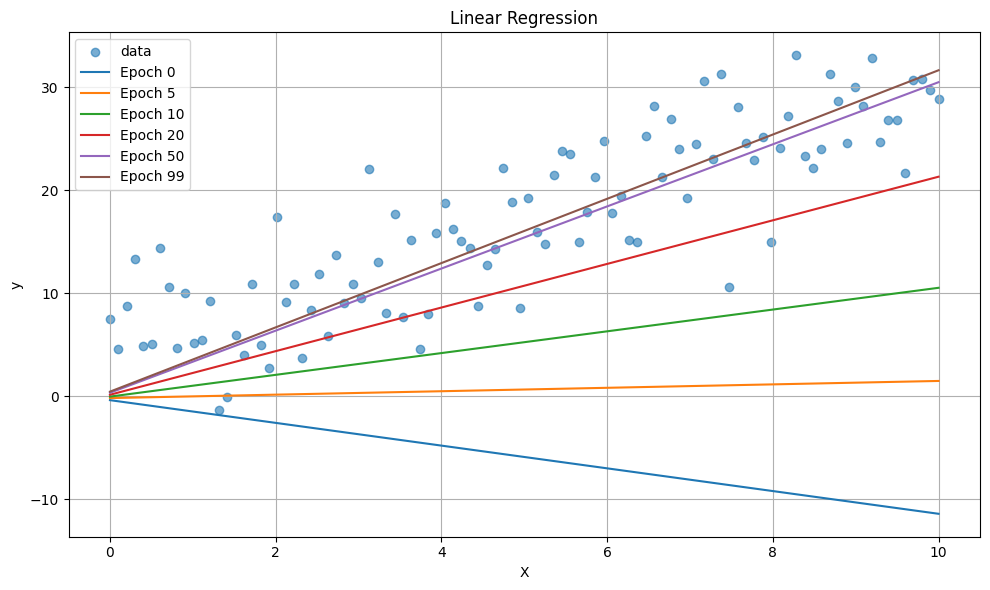

In [ ]:
# Linear Regression

import numpy as np

import matplotlib.pyplot as plt


np.random.seed(42)
n_samples = 100
X = np.linspace(0, 10, n_samples)
true_slope = 2.5
true_intercept = 5.0
noise = np.random.normal(0, 5.0, n_samples)
y = true_slope * X + true_intercept +noise

# Add bias term to X
X_design = np.vstack([X, np.ones_like(X)]).T

# Initialize weights (slope and intercept)
weights = np.random.randn(2)
learning_rate = 0.001
epochs = 100
line_params = []

# Gradient Descent
for epoch in range(epochs):
    y_pred = X_design @ weights
    error = y_pred - y
    gradients = 2 * X_design.T @ error / n_samples
    weights -= learning_rate * gradients
    line_params.append(weights.copy())

# Plotting
x_vals = np.linspace(0, 10, 100)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="data", alpha=0.6)

# Plot regression lines at selected epochs
for epoch in [0, 5, 10, 20, 50, 99]:
    slope, intercept = line_params[epoch]
    plt.plot(x_vals, slope * x_vals + intercept, label=f"Epoch {epoch}")

plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# read a csv file and convert to a data frame

import pandas as pd
df = pd.read_csv('advertising.csv')

In [ ]:
df.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

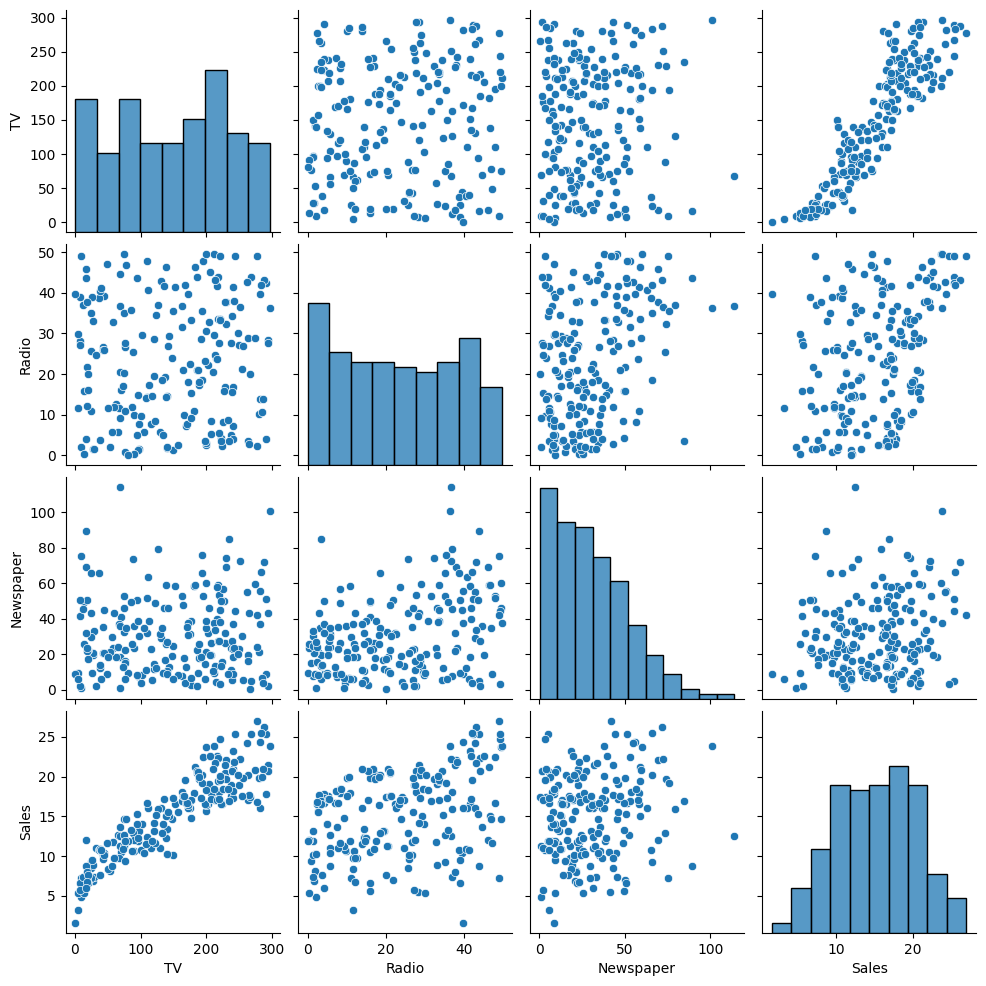

In [ ]:
# obtain the pair plots for all the columns in the dataframe

import seaborn as sns
sns.pairplot(df)

TV              Axes(0.125,0.11;0.168478x0.77)
Radio        Axes(0.327174,0.11;0.168478x0.77)
Newspaper    Axes(0.529348,0.11;0.168478x0.77)
Sales        Axes(0.731522,0.11;0.168478x0.77)
dtype: object

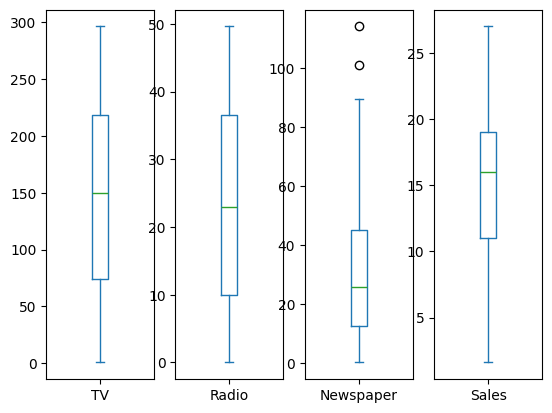

In [ ]:
# Plot box plot for the columns of the dataframe

df.plot(kind='box', subplots=True, layout=(1, 4), sharex=False, sharey=False)

<Axes: >

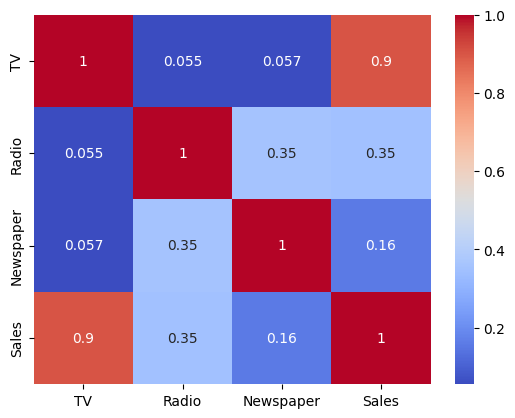

In [ ]:
# get the co-relation matrix between the columns of the data frame.
# use the gradients to visually explain the magnitude of co-relation

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [ ]:
# use sklearn linear regression model
# first 3 columns of the df is the features
# last column is the actual target

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
# evaluate the MSE loss and print it

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.9077569102710896


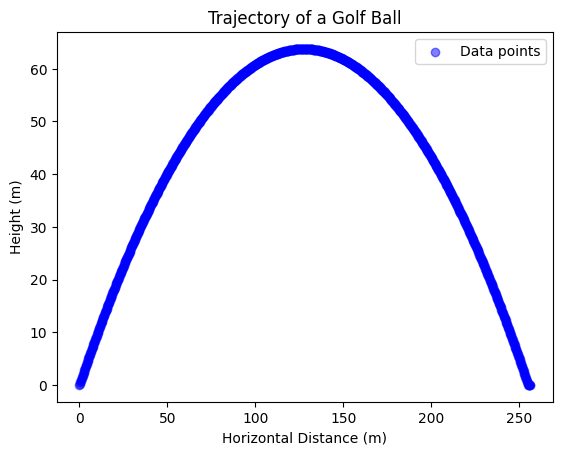

Mean Squared Error (Linear Regression): 365.2021121407612


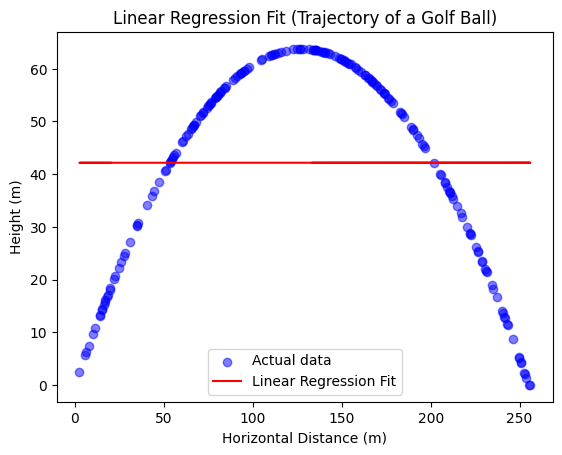

Fitted Parameters for Quadratic Model: a = -0.00391863576149221, b = 0.999721816833411, c = 0.008761221790803854
Mean Squared Error (Quadratic Model): 0.004683864843631869


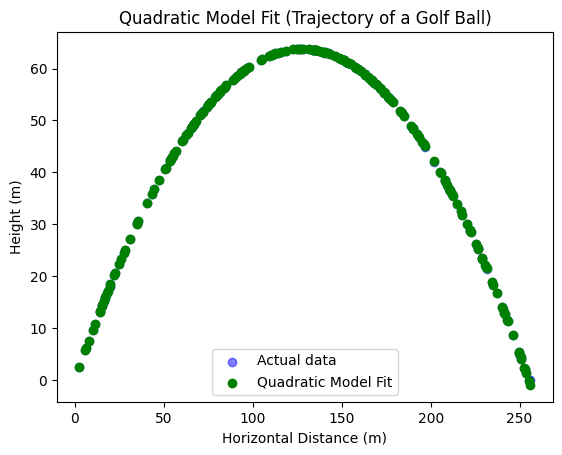

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit

# Generate synthetic data for the trajectory of a golf ball
np.random.seed(42)
g = 9.8  # Acceleration due to gravity (m/s^2)
v0 = 50  # Initial velocity (m/s)
theta = 45  # Launch angle in degrees
theta_rad = np.radians(theta)  # Convert angle to radians

# Time values from 0 to 10 seconds, 1000 data points
time = np.linspace(0, 7.25, 1000)

# Calculate horizontal (x) and vertical (y) position
x = v0 * np.cos(theta_rad) * time
y = v0 * np.sin(theta_rad) * time - 0.5 * g * time**2
y = np.maximum(y, 0)  # Ensure height is non-negative

# Create a DataFrame
data = pd.DataFrame({'Time': time, 'X': x, 'Y': y})

# Scatter plot of the data
plt.scatter(data['X'], data['Y'], color='blue', alpha=0.5, label='Data points')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Height (m)')
plt.title('Trajectory of a Golf Ball')
plt.legend()
plt.show()

# Prepare data for regression
X = data[['X']]
y = data['Y']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Calculate Mean Squared Error for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Mean Squared Error (Linear Regression): {mse_linear}')

# Plot Linear Regression results
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual data')
plt.plot(X_test, y_pred_linear, color='red', label='Linear Regression Fit')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Height (m)')
plt.title('Linear Regression Fit (Trajectory of a Golf Ball)')
plt.legend()
plt.show()

# Define the quadratic function ax^2 + bx + c
def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the quadratic model to the training data
params, covariance = curve_fit(quadratic_model, X_train['X'], y_train)

# Extract the parameters
a, b, c = params
print(f"Fitted Parameters for Quadratic Model: a = {a}, b = {b}, c = {c}")

# Predict using the fitted quadratic model
y_pred_quad = quadratic_model(X_test['X'], a, b, c)

# Calculate Mean Squared Error for the quadratic model
mse_quad = mean_squared_error(y_test, y_pred_quad)
print(f'Mean Squared Error (Quadratic Model): {mse_quad}')

# Plot Quadratic Model results
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual data')
plt.scatter(X_test, y_pred_quad, color='green', label='Quadratic Model Fit')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Height (m)')
plt.title('Quadratic Model Fit (Trajectory of a Golf Ball)')
plt.legend()
plt.show()


Mean Squared Error (Unregularized Polynomial Regression - Degree 25): 585.8658
Mean Squared Error (Ridge Regularized Polynomial Regression - Degree 25): 237.5961
Mean Squared Error (Lasso Regularized Polynomial Regression - Degree 25): 221.1915


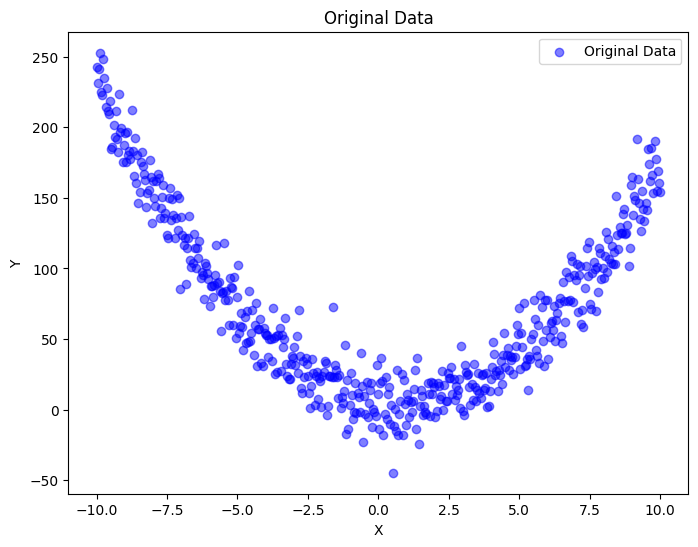

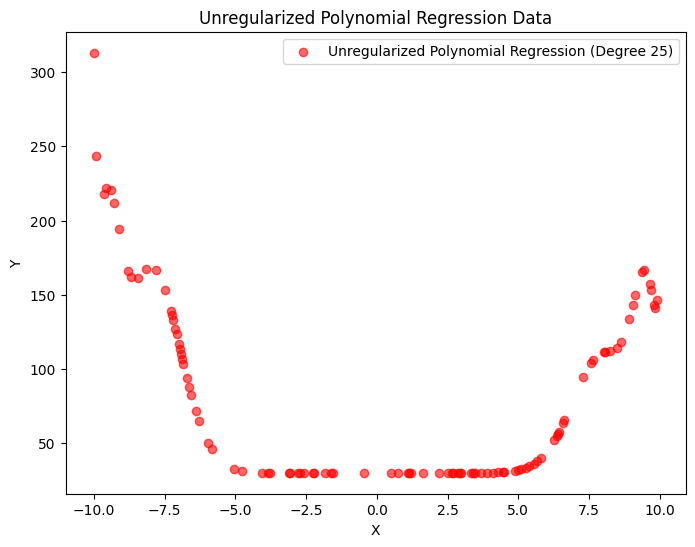

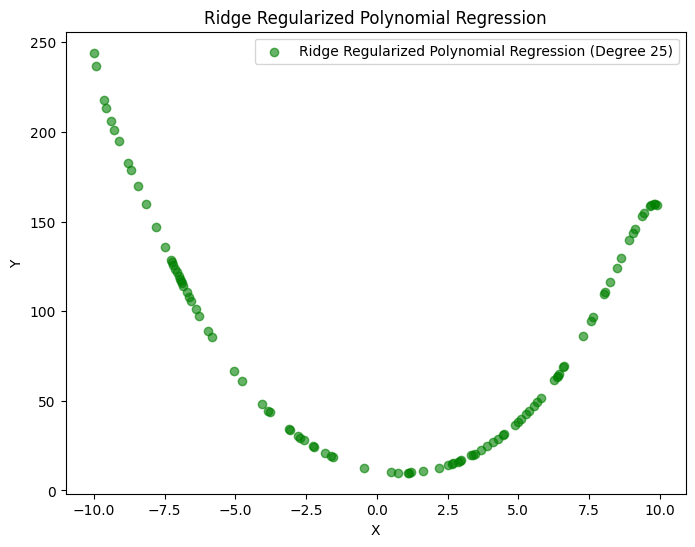

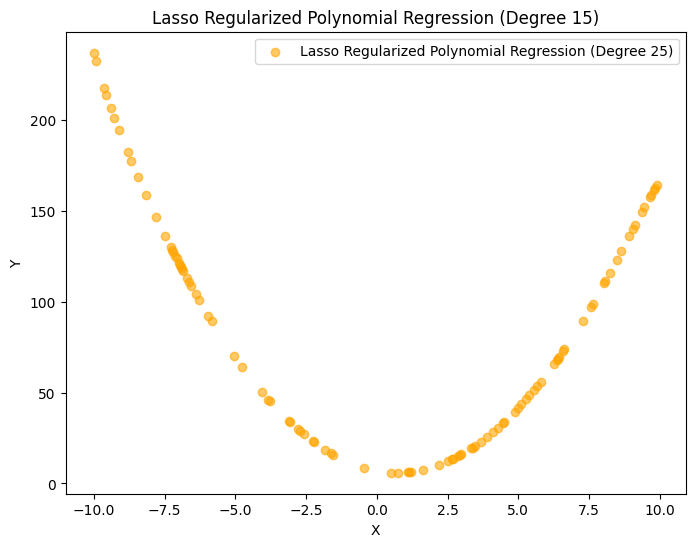

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Step 1: Generate Non-Linear Synthetic Data (2nd Degree Polynomial Data)
np.random.seed(42)
X = np.linspace(-10, 10, 500)  # 100 data points between -5 and 5
Y = 2 * X**2 - 3 * X + 5 + np.random.normal(0, 15, 500)  # 2nd degree polynomial relationship with high noise

# Reshape X for model compatibility
X = X.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 2: Create a Polynomial Regression Model of Degree 25 Without Regularization (Overfitting Scenario)
poly_degree = 25
poly_reg_model = make_pipeline(PolynomialFeatures(degree=poly_degree), LinearRegression())
poly_reg_model.fit(X_train, y_train)
y_pred_poly = poly_reg_model.predict(X_test)

# Calculate MSE for Unregularized Polynomial Regression Model
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'Mean Squared Error (Unregularized Polynomial Regression - Degree 25): {mse_poly:.4f}')

# Step 3: Create a Polynomial Regression Model of Degree 25 With Ridge (L2) Regularization
ridge_reg_model = make_pipeline(PolynomialFeatures(degree=poly_degree),StandardScaler(), Ridge(alpha=10.0))
ridge_reg_model.fit(X_train, y_train)
y_pred_ridge = ridge_reg_model.predict(X_test)

# Calculate MSE for Ridge Regularized Polynomial Regression Model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error (Ridge Regularized Polynomial Regression - Degree 25): {mse_ridge:.4f}')

# Step 4: Create a Polynomial Regression Model of Degree 25 With Lasso (L1) Regularization
lasso_reg_model = make_pipeline(PolynomialFeatures(degree=poly_degree),StandardScaler(), Lasso(alpha=0.5, max_iter=10000))
lasso_reg_model.fit(X_train, y_train)
y_pred_lasso = lasso_reg_model.predict(X_test)

# Calculate MSE for Lasso Regularized Polynomial Regression Model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error (Lasso Regularized Polynomial Regression - Degree 25): {mse_lasso:.4f}')

# Step 5: Plot the Results with Scatter Plots for Better Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', alpha=0.5, label='Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original Data')
plt.legend()
plt.show()

# Scatter plot for unregularized polynomial regression results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_pred_poly, color='red', alpha=0.6, label='Unregularized Polynomial Regression (Degree 25)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Unregularized Polynomial Regression Data')
plt.legend()
plt.show()

# Scatter plot for Ridge regression results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_pred_ridge, color='green', alpha=0.6, label='Ridge Regularized Polynomial Regression (Degree 25)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ridge Regularized Polynomial Regression')
plt.legend()
plt.show()

# Scatter plot for Lasso regression results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_pred_lasso, color='orange', alpha=0.6, label='Lasso Regularized Polynomial Regression (Degree 25)')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Lasso Regularized Polynomial Regression (Degree 15)')
plt.legend()
plt.show()


Original Points (x, y): [(-4, 10), (9, -7), (4, -3), (0, -8), (-3, 10), (10, -9), (-4, 1), (8, -5), (0, -9), (0, 10)]

Fitting Polynomial with 2 points:
Coefficients: [-1.30769231  4.76923077]


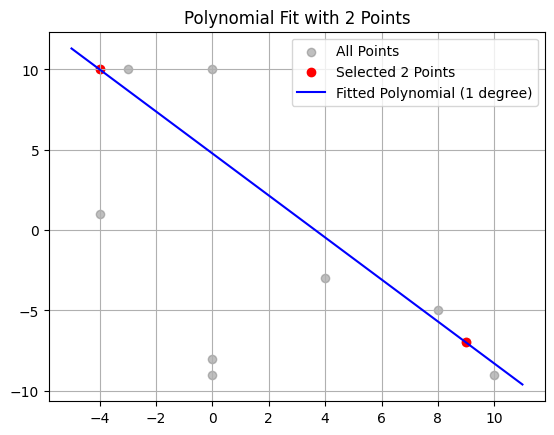


Fitting Polynomial with 3 points:
Coefficients: [ 0.06346154 -1.625       2.48461538]


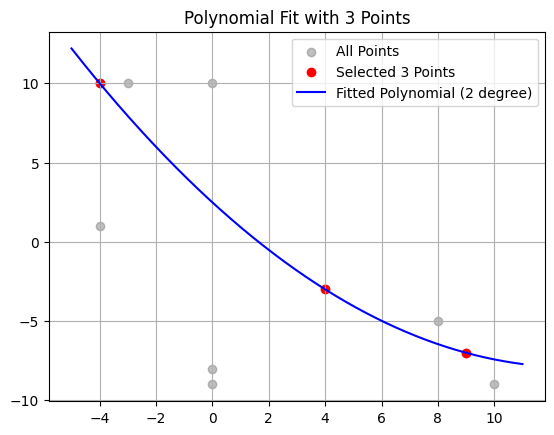


Fitting Polynomial with 4 points:
Coefficients: [-0.07280983  0.71875    -0.46004274 -8.        ]


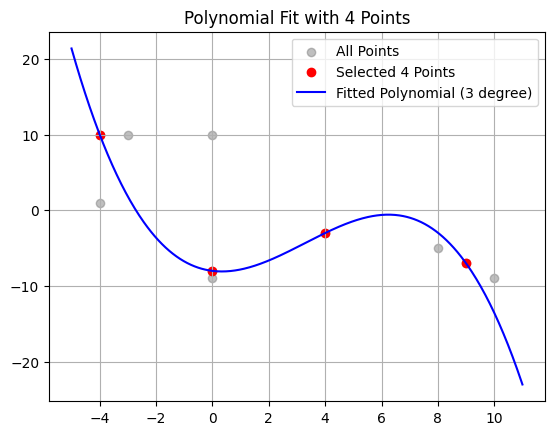


Fitting Polynomial with 5 points:
Coefficients: [-0.03248118  0.21952076  1.23844882 -5.13733211 -8.        ]


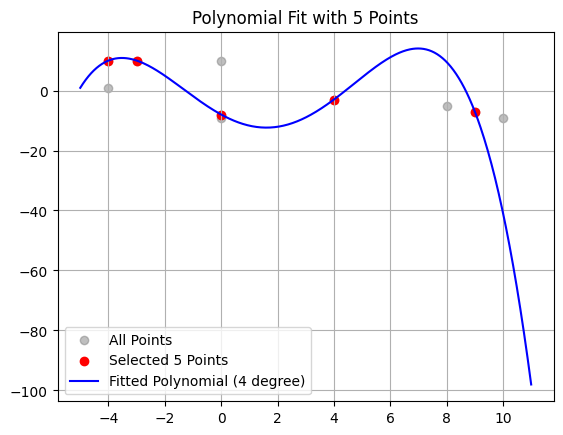


Fitting Polynomial with 6 points:
Coefficients: [ 2.91386854e-03 -4.99643875e-02  9.42244098e-02  1.51818020e+00
 -3.87854090e+00 -8.00000000e+00]


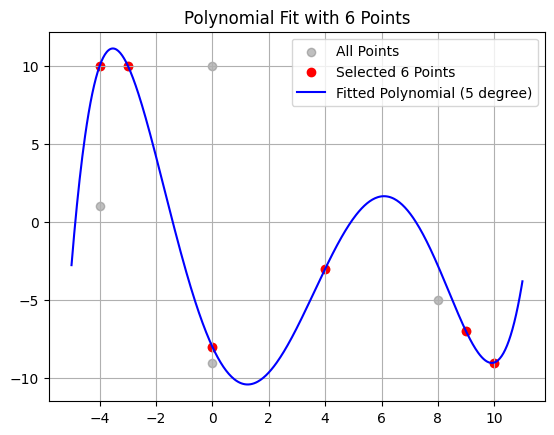


Fitting Polynomial with 7 points:


LinAlgError: Singular matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate Points
def generate_points(num_points):
    np.random.seed(42)  # Set a seed for reproducibility
    # generate only integer numbers

    x = np.random.randint(-10, 11, size=num_points)
    y = np.random.randint(-10, 11, size=num_points)
    return x, y

# Step 2: Solve for Polynomial Coefficients
def fit_polynomial(x, y):
    n = len(x)
    A = np.vander(x, n, increasing=True)  # Vandermonde matrix
    coeffs = np.linalg.solve(A, y)       # Solve linear system
    return coeffs

# Step 3: Evaluate Polynomial
def evaluate_polynomial(coeffs, x):
    return np.polyval(coeffs[::-1], x)  # Evaluate polynomial using coefficients

# Step 4: Iteratively Fit and Plot
def iterative_polynomial_fitting(x, y):
    for i in range(2, len(x) + 1):  # Start with 2 points up to all points
        print(f"\nFitting Polynomial with {i} points:")
        x_subset = x[:i]
        y_subset = y[:i]
        coeffs = fit_polynomial(x_subset, y_subset)
        print(f"Coefficients: {coeffs[::-1]}")  # Reverse for traditional polynomial order

        # Plot the current polynomial
        plot_polynomial(x, y, x_subset, y_subset, coeffs, i)

# Step 5: Plot
def plot_polynomial(x_all, y_all, x_subset, y_subset, coeffs, num_points):
    x_range = np.linspace(min(x_all) - 1, max(x_all) + 1, 500)
    y_range = evaluate_polynomial(coeffs, x_range)

    plt.scatter(x_all, y_all, color='gray', alpha=0.5, label='All Points')
    plt.scatter(x_subset, y_subset, color='red', label=f'Selected {num_points} Points')
    plt.plot(x_range, y_range, color='blue', label=f'Fitted Polynomial ({num_points-1} degree)')
    plt.title(f'Polynomial Fit with {num_points} Points')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main
num_points = 10  # Total number of points
# generate the points only with integer values

x, y = generate_points(num_points)
print(f"Original Points (x, y): {list(zip(x, y))}")
iterative_polynomial_fitting(x, y)


In [ ]:
# give me the co-effs for the 3rd degree polynomial passing through points (-4,10),(9,-7),(4,-3) and (0,-8)

import numpy as np
x_points = np.array([-4, 9, 4, 0, -3])
y_points = np.array([10, 7, -3, -8, 10])
coefficients = np.polyfit(x_points, y_points, 4)  # 3 for a 3rd-degree polynomial
print("Coefficients:", coefficients)


Coefficients: [-0.03048687  0.22550366  1.20653999 -5.23305861 -8.        ]


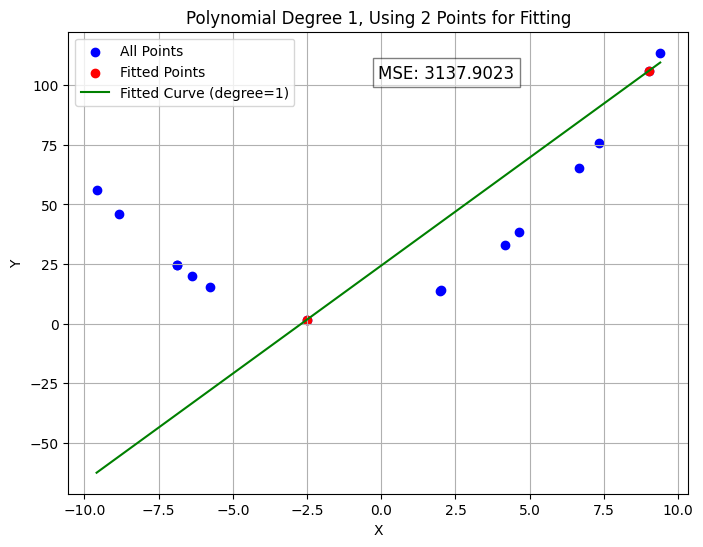

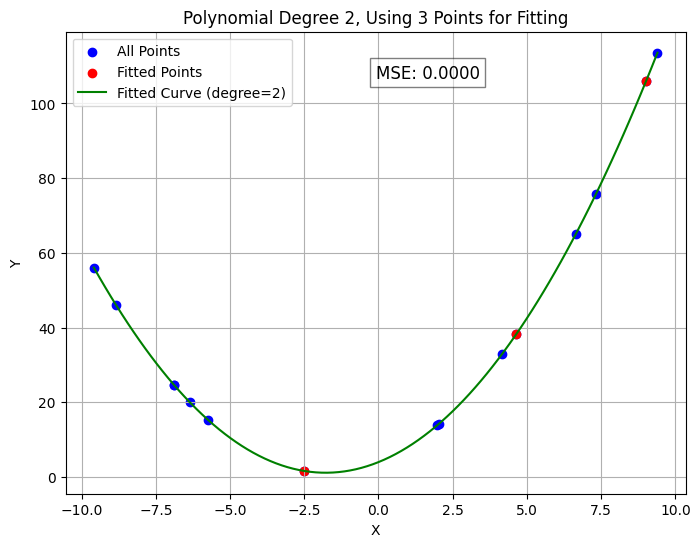

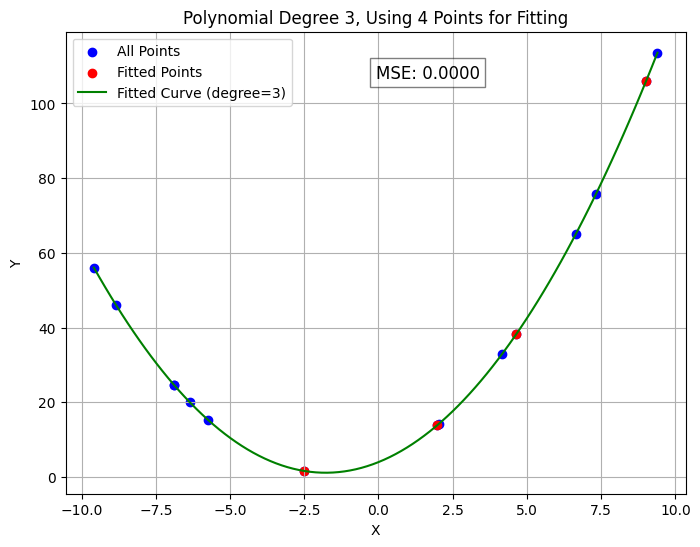

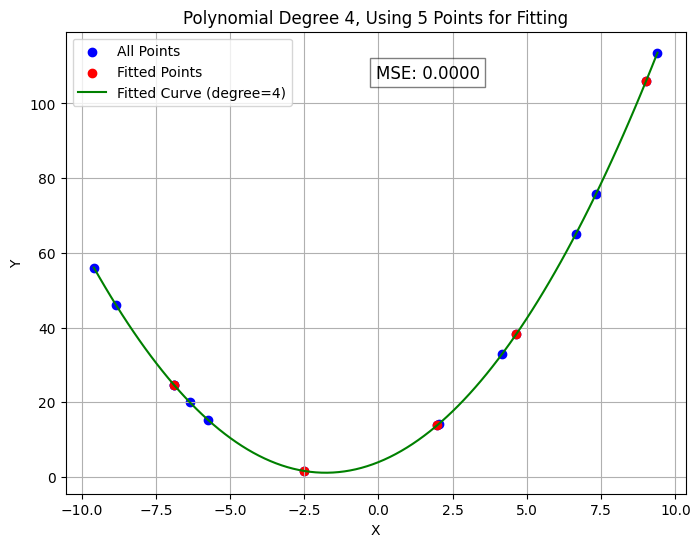

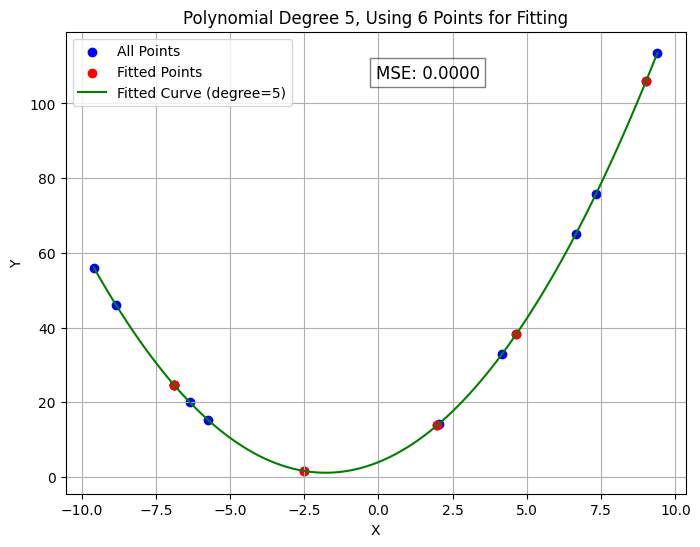

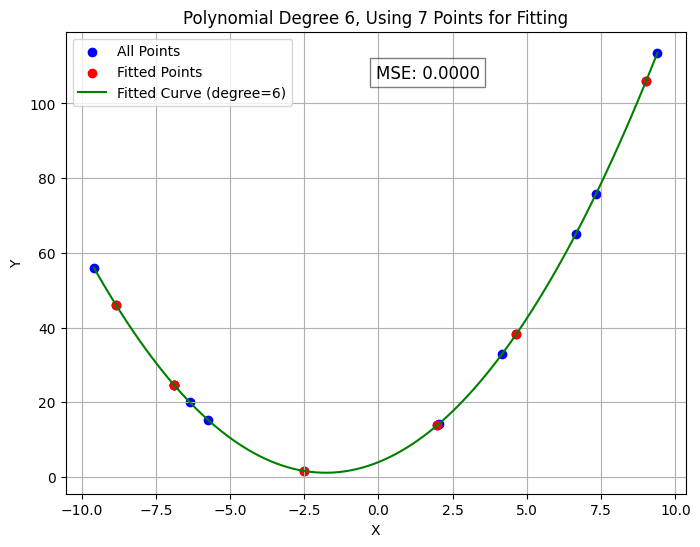

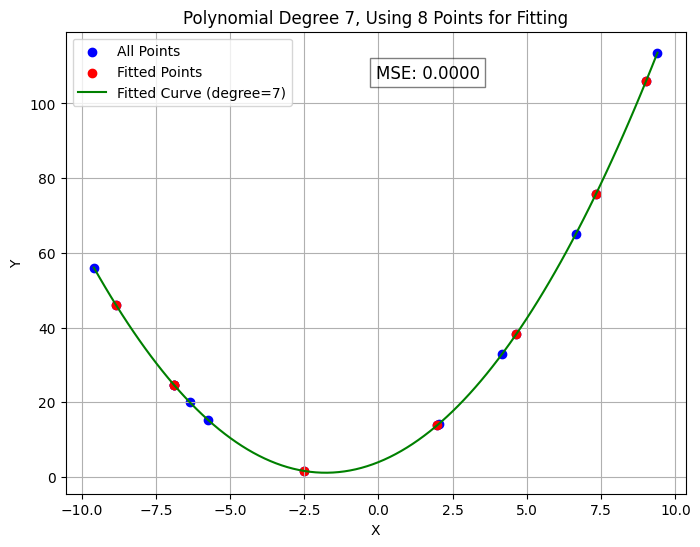

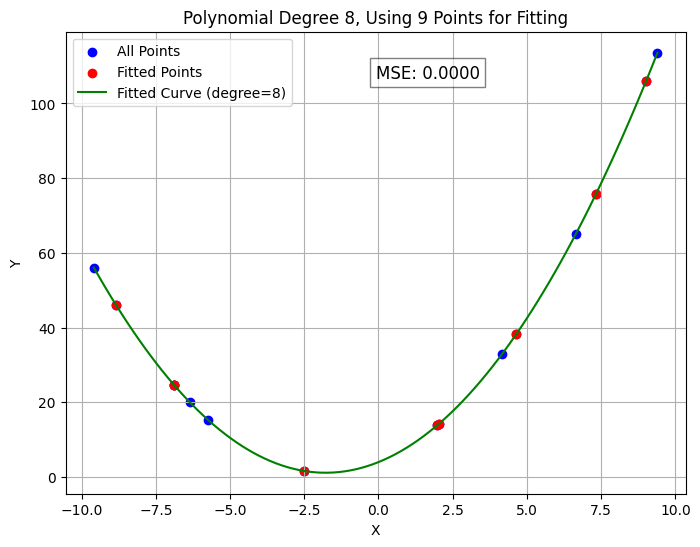

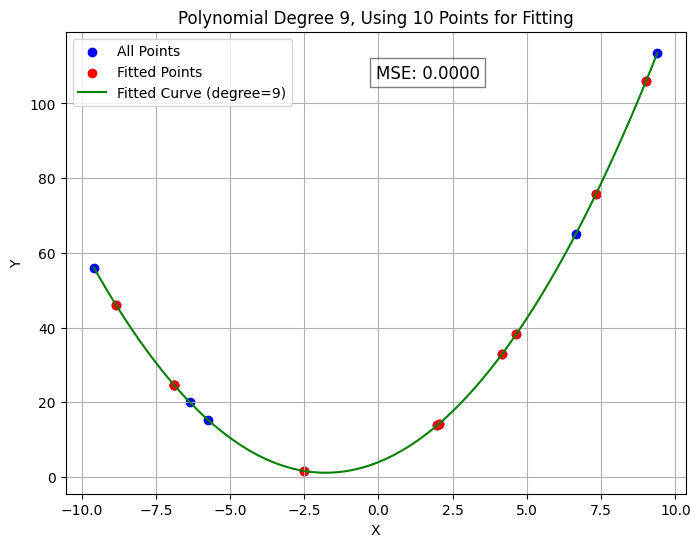

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from numpy.polynomial.polynomial import Polynomial

# Sample 15 random points from the X-Y plane
np.random.seed(42)  # For reproducibility
x = np.random.uniform(-10, 10, 15)
y = 0.9*(x**2) + 3.2*x + 4 #+ np.random.normal(0, 2, 15)
#y = np.random.uniform(-10, 10, 15)

mse_list = []

# Loop through polynomial degrees and plot
for j in range(2, 11):
    # Select j points for fitting
    fit_x = x[:j]
    fit_y = y[:j]

    # Fit a polynomial of degree j-1
    coefs = np.polyfit(fit_x, fit_y, deg=j-1)
    poly = np.poly1d(coefs)

    # Calculate MSE on the remaining points
    remaining_x = x[j:]
    remaining_y = y[j:]
    if len(remaining_x) > 0:
        predicted_y = poly(remaining_x)
        mse = mean_squared_error(remaining_y, predicted_y)
        mse_list.append(mse)
    else:
        mse = 0.0  # If no remaining points, no error

    # Generate points for plotting the fitted curve
    x_curve = np.linspace(min(x), max(x), 100)
    y_curve = poly(x_curve)

    # Plot the points and the fitted curve
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color="blue", label="All Points")
    plt.scatter(fit_x, fit_y, color="red", label="Fitted Points")
    plt.plot(x_curve, y_curve, color="green", label=f"Fitted Curve (degree={j-1})")

    # Annotate MSE
    plt.text(0.5, 0.9, f"MSE: {mse:.4f}", transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    # Add labels and legend
    plt.title(f"Polynomial Degree {j-1}, Using {j} Points for Fitting")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)

    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:,:2] # all rows and first 2 cols
y = (iris.target == 0).astype(int) # compare and get the Y for binary classification

In [ ]:
class Perceptron:
  def __init__(self,lr=0.01,epochs=50):
    self.lr = lr
    self.epochs = epochs
    self.weights = None
    self.bias = None

  def fit(self,X,y):
    n_samples , n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for epoch in range(self.epochs):
      for idx,x_i in enumerate(X):
        # Prediction
        linear_output = np.dot(x_i,self.weights) + self.bias
        y_pred = 1 if linear_output >=0 else 0

        # Updation of weights
        update = self.lr * (y[idx] - y_pred) # in this specific case - Gradient and Error both are same
        self.weights += update*x_i
        self.bias += update

      if epoch % 10 == 0:
        self.plot_decision_boundary(X,y,epoch)

  def predict(self,X):
    linear_output = np.dot(X,self.weights) + self.bias
    return np.where(linear_output >=0,1,0)

  def plot_decision_boundary(self,X,y,epoch):

    if self.weights[1] == 0:
      return # avoiding the division by 0 in line 39

    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr',alpha=0.7)
    x_vals = np.linspace(X[:,0].min(),X[:,0].max(),100)
    y_vals = -(self.weights[0] * x_vals + self.bias) / self.weights[1]
    plt.plot(x_vals,y_vals,'k')
    plt.title(f"Perceptron algo - epoch -> {epoch+1}")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Weidth")

    plt.show()



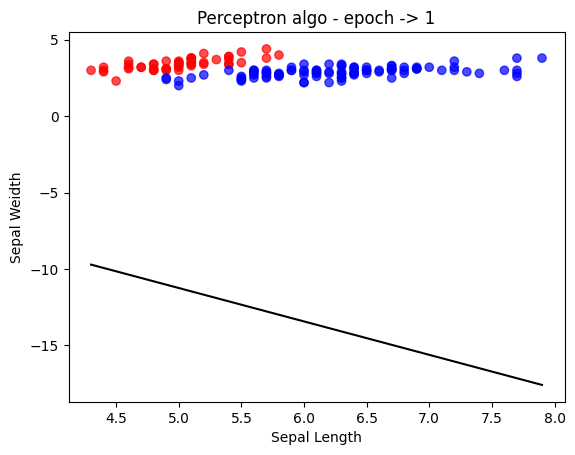

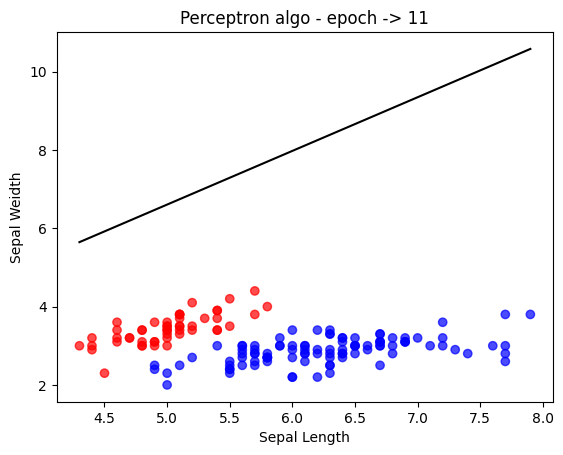

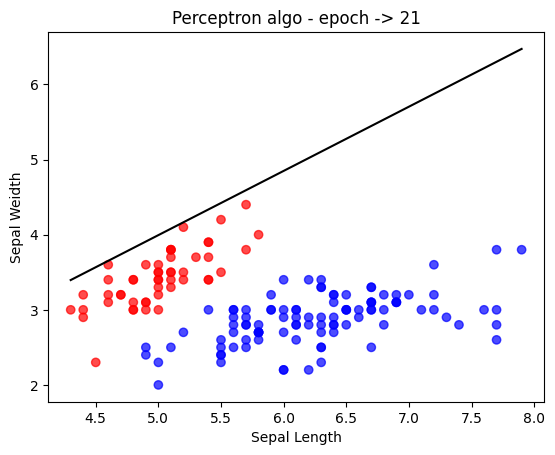

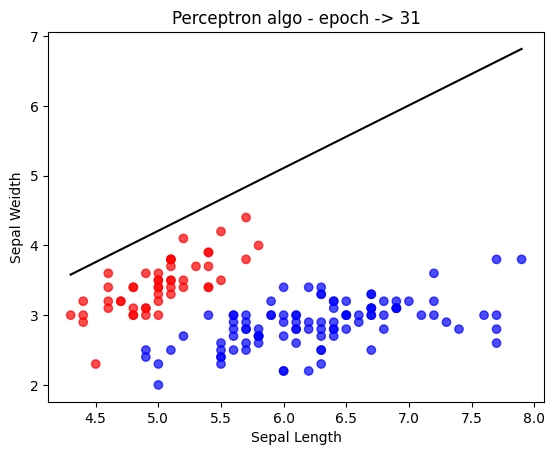

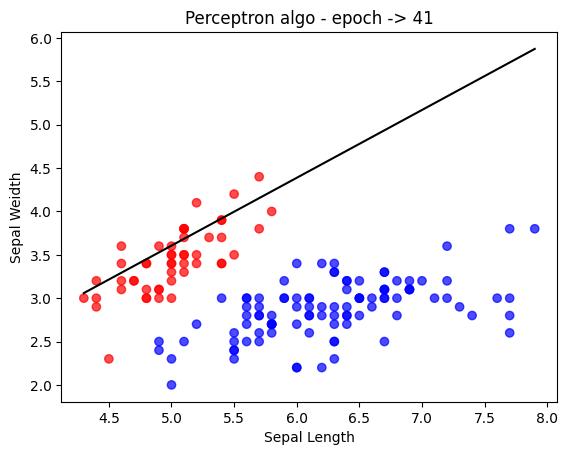

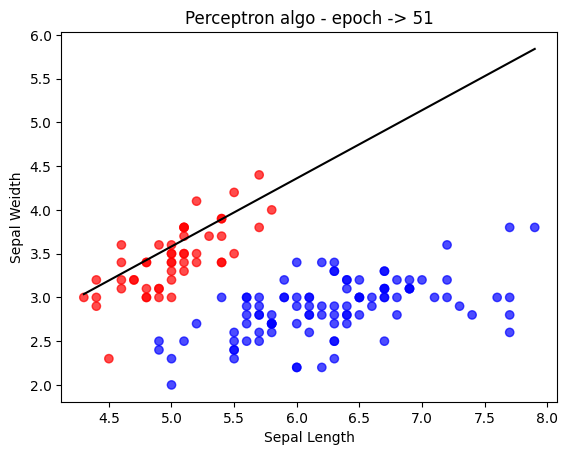

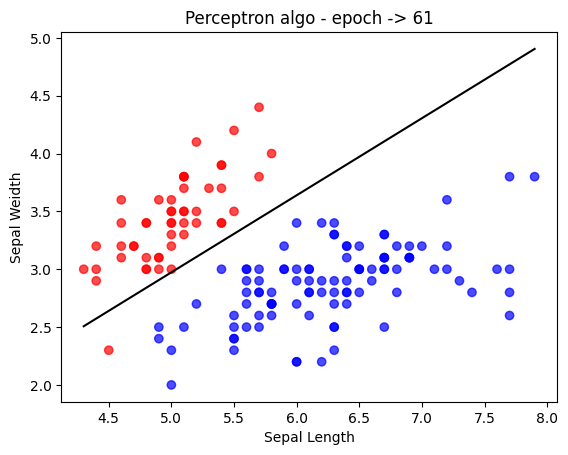

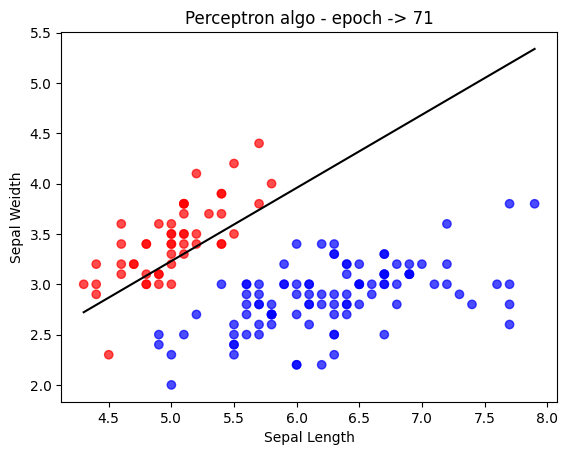

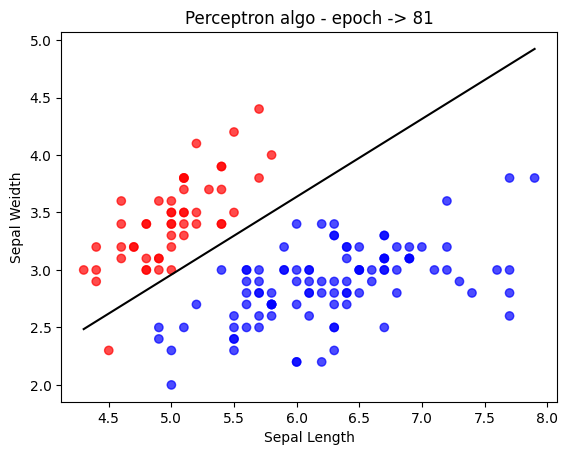

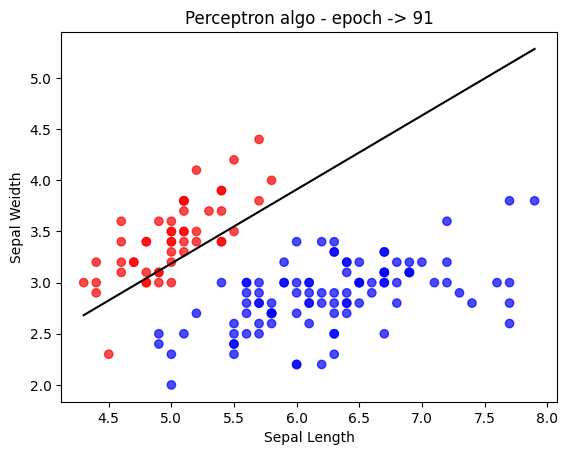

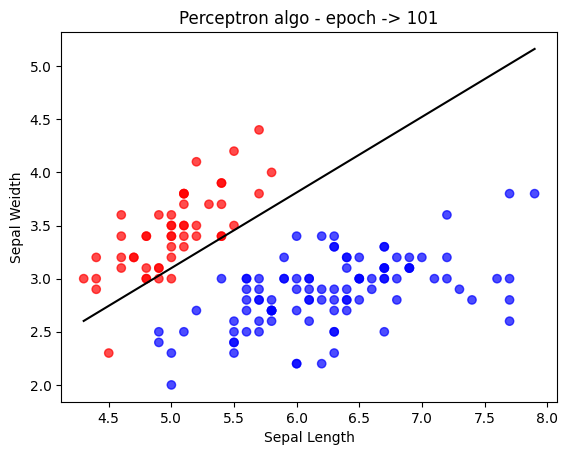

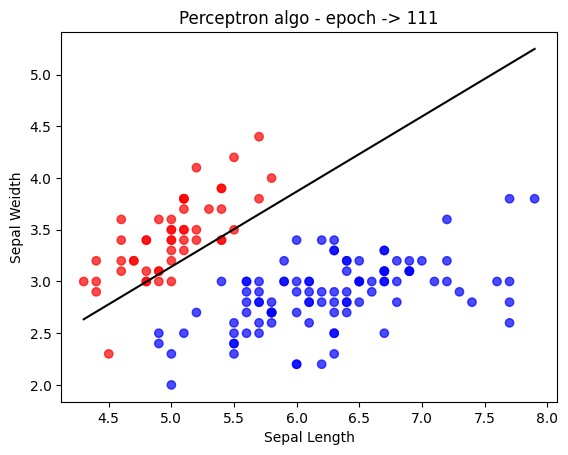

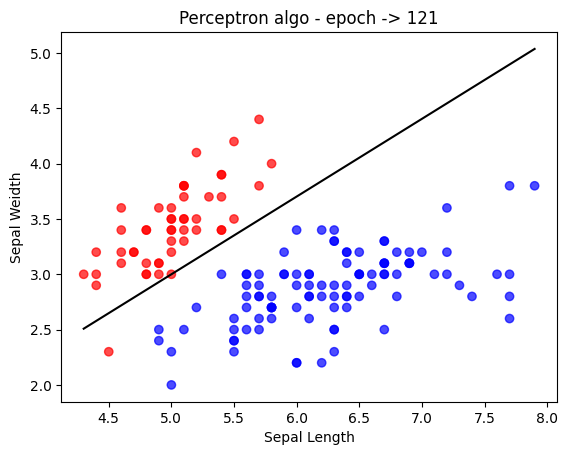

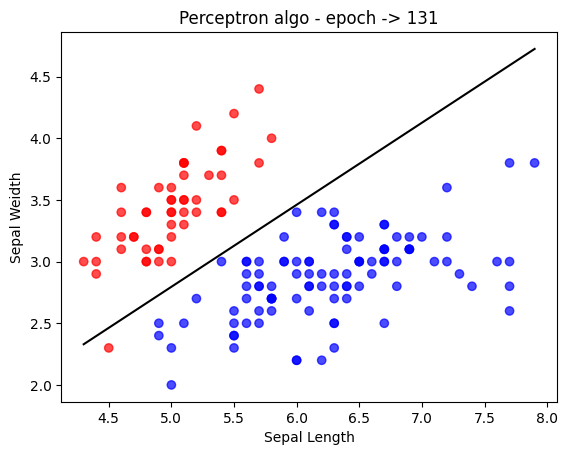

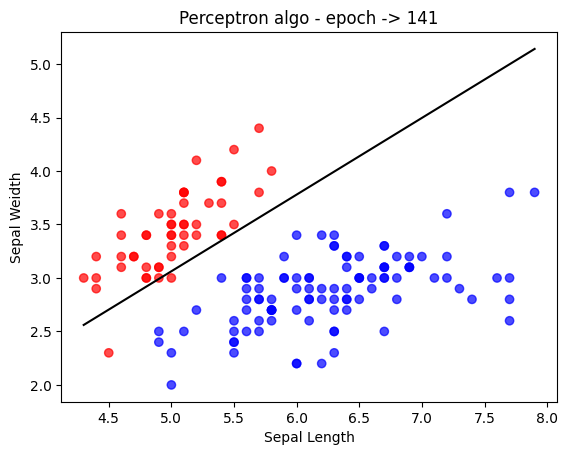

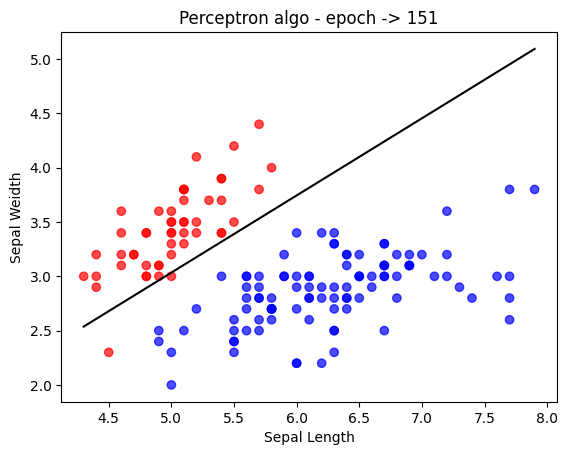

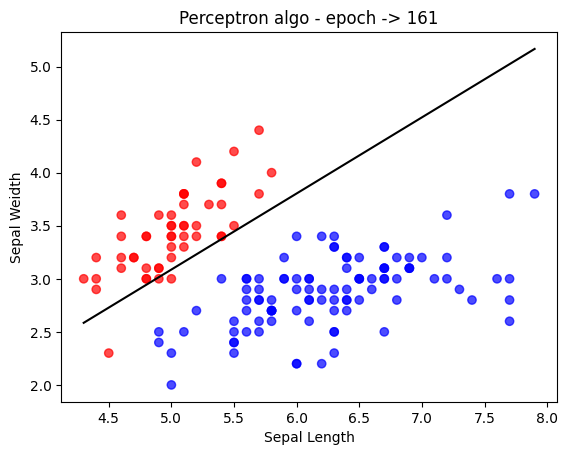

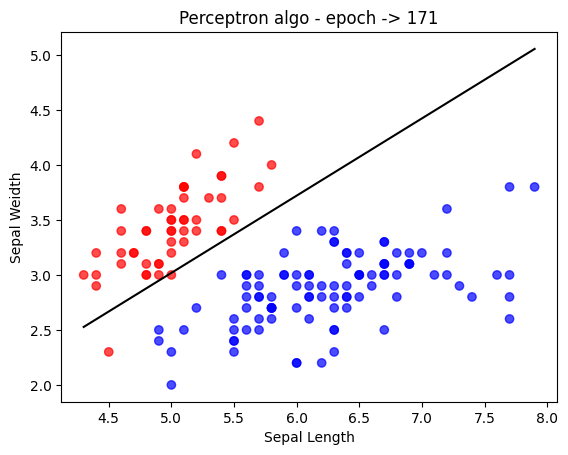

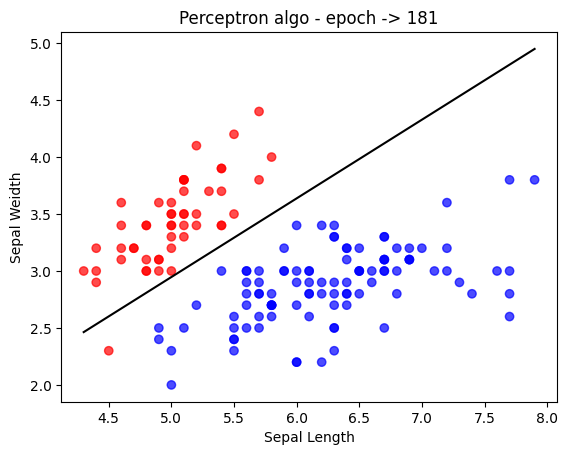

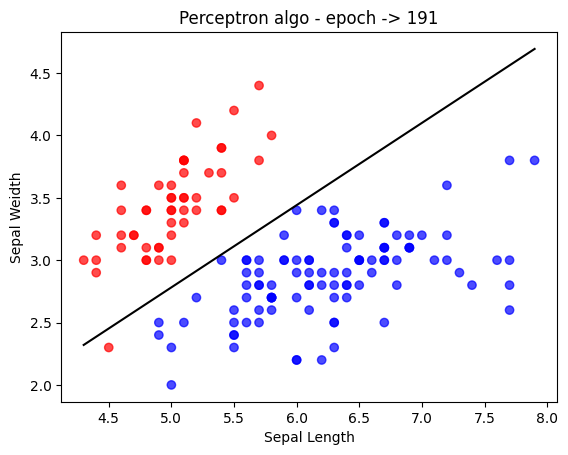

In [ ]:
preceptron = Perceptron(0.01,200)
preceptron.fit(X,y)

In [ ]:
def compute_metrics(y_true, y_pred):
  tp = sum((y_true == 1) & (y_pred == 1))
  tn = sum((y_true == 0) & (y_pred == 0))
  fp = sum((y_true == 0) & (y_pred == 1))
  fn = sum((y_true == 1) & (y_pred == 0))
  acc = np.mean(y_true == y)

  precision = tp / (tp+fp)
  recall = tp /(tp+fn)
  f1_score = 2* (precision*recall) / (precision+recall)

  return precision,recall,f1_score,acc

y_pred = preceptron.predict(X)

precision,recall,f1_score,acc = compute_metrics(y,y_pred)

print(f"Precision -> {precision}, Recall -> {recall}, F1-Score -> {f1_score} , acc -> {acc}")


Precision -> 1.0, Recall -> 0.98, F1-Score -> 0.98989898989899 , acc -> 1.0


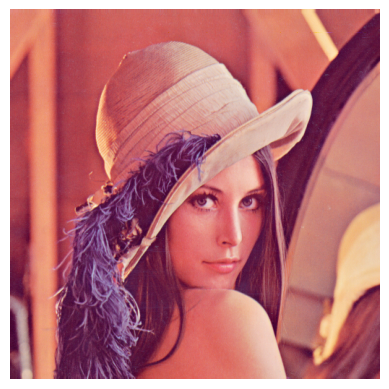

In [ ]:
# PCA Code

# read the image and display it

from PIL import Image
import matplotlib.pyplot as plt

image = Image.open('/content/Lenna_(test_image).png') # Replace 'image.jpg' with the actual path of your image

plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

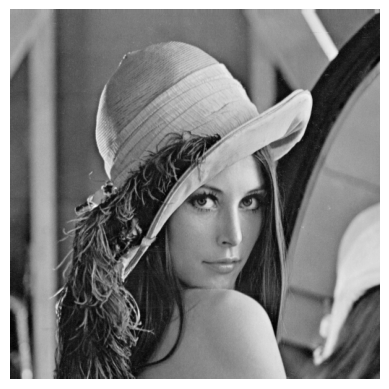

In [ ]:
# convert the RGB image into the graysclage image and show it

import numpy as np
from PIL import Image

# Open the image
image = Image.open('/content/Lenna_(test_image).png')

# convert to greyscale

grayscale_image = image.convert('L')

# Convert the image to a NumPy array
image_array = np.array(grayscale_image)

# Display the grayscale image
plt.imshow(image_array, cmap='gray')
plt.axis('off')

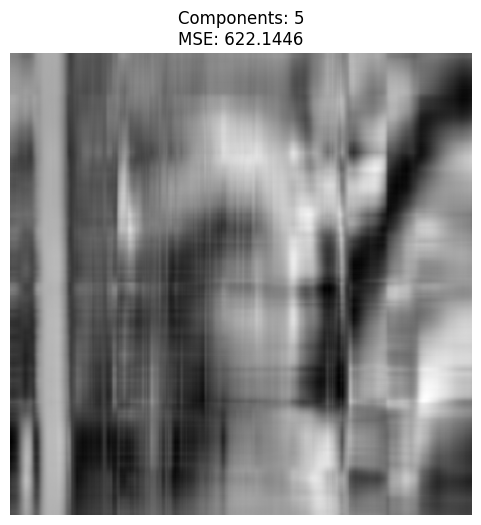

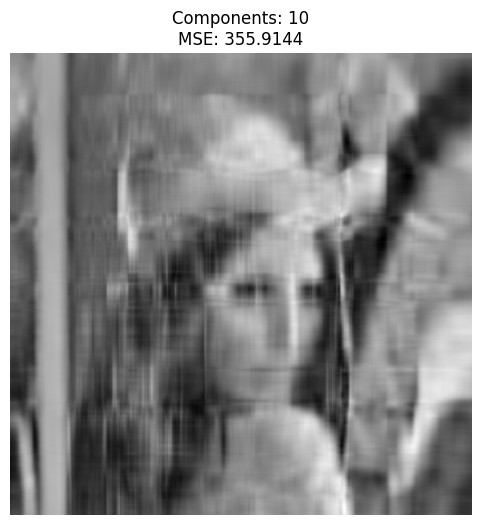

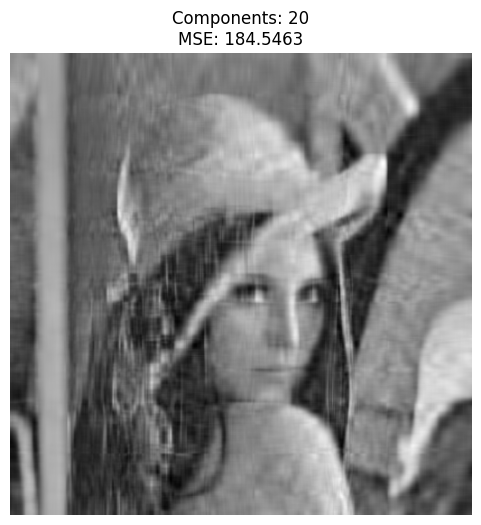

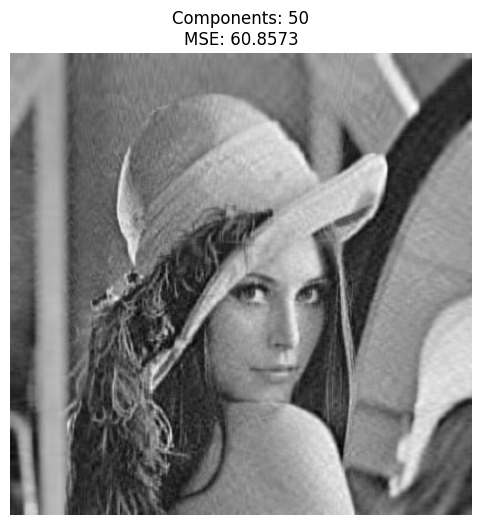

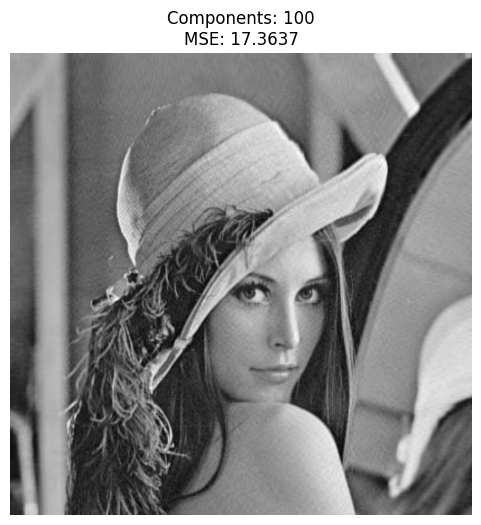

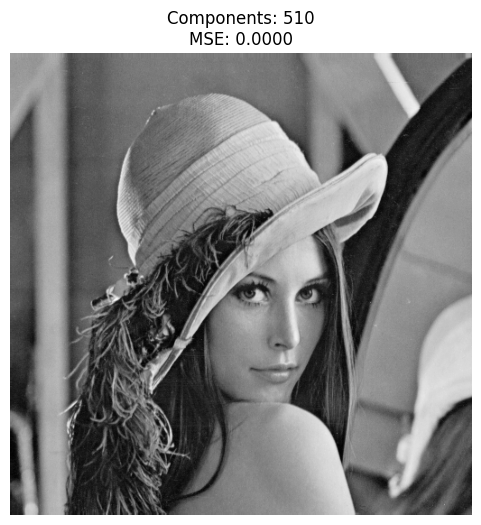

In [ ]:

import numpy as np
from sklearn.decomposition import PCA
from skimage.io import imread # or use any other image reading library like cv2 or PIL


components_to_check = [5, 10, 20, 50, 100, 510]
mse_list = []

for n_components in components_to_check:
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(image_array)
    reconstructed = pca.inverse_transform(principal_components)
    reconstructed_image = reconstructed.reshape(image_array.shape)

    mse = np.mean((image_array - reconstructed_image) ** 2)
    mse_list.append((n_components, mse))

    # Show image individually
    plt.figure(figsize=(6, 6))
    plt.imshow(reconstructed_image, cmap='gray')
    plt.axis('off')
    plt.title(f'Components: {n_components}\nMSE: {mse:.4f}')
    plt.show()

    # Optionally save each image
    plt.imsave(f'reconstructed_{n_components}_components.png', reconstructed_image, cmap='gray')

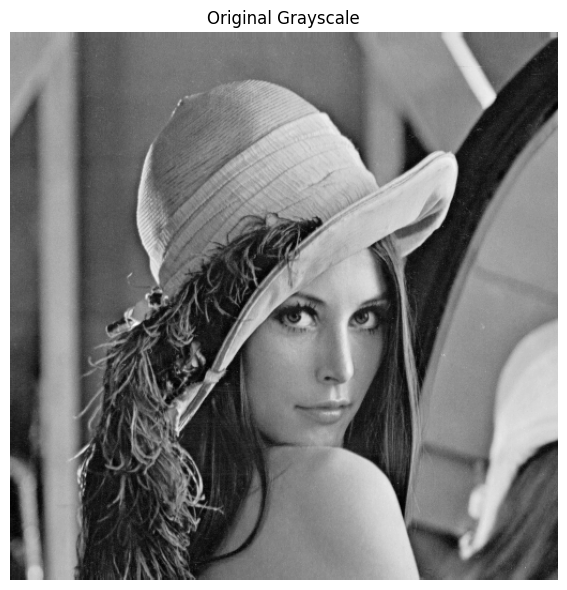

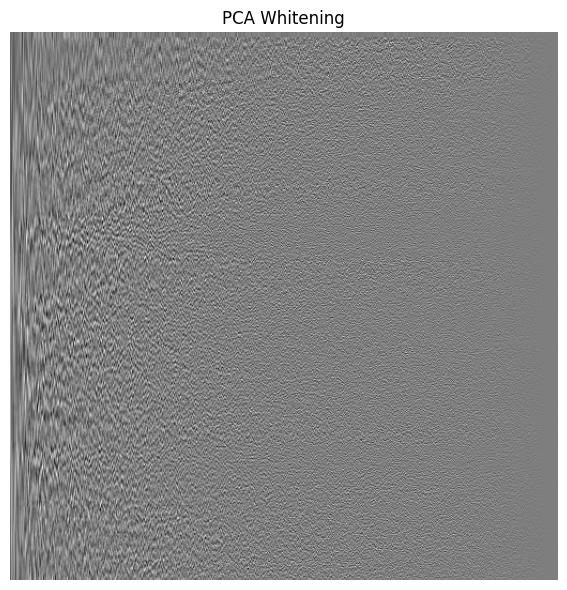

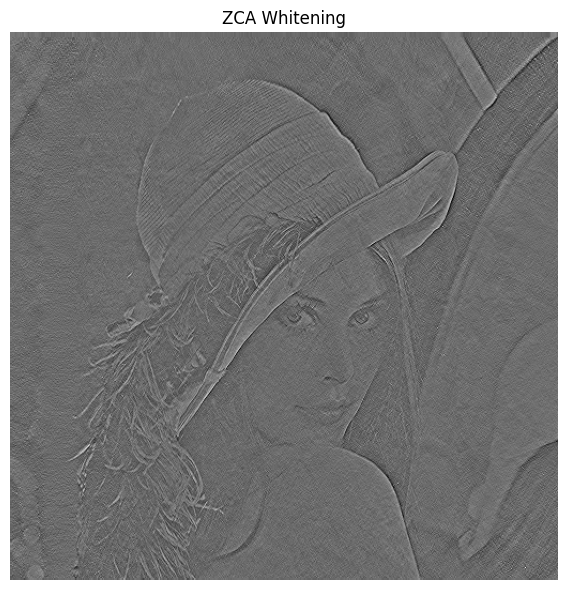

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 1. Load and preprocess image
image = Image.open('/content/Lenna_(test_image).png')
grayscale_image = image.convert('L')
image_array = np.array(grayscale_image).astype(np.float32) / 255.0  # Normalize to [0, 1]

# 2. Center the data
X = image_array
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean  # shape: (H, W)

# 3. Covariance matrix
sigma = np.cov(X_centered, rowvar=False)  # shape: (W, W)

# 4. Eigen decomposition (SVD)
U, S, _ = np.linalg.svd(sigma)

# 5. Whitening constant
epsilon = 1e-5

# 6. PCA Whitening
X_pca_white = (X_centered @ U) / np.sqrt(S + epsilon)

# 7. ZCA Whitening
X_zca_white = X_pca_white @ U.T

plt.figure(figsize=(6, 6))
plt.imshow(X, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')
plt.tight_layout()
plt.savefig('original_grayscale.png', bbox_inches='tight')
plt.show()

# 2. Display and save the PCA-whitened image
plt.figure(figsize=(6, 6))
plt.imshow(X_pca_white, cmap='gray')
plt.title('PCA Whitening')
plt.axis('off')
plt.tight_layout()
plt.savefig('pca_whitened.png', bbox_inches='tight')
plt.show()

# 3. Display and save the ZCA-whitened image
plt.figure(figsize=(6, 6))
plt.imshow(X_zca_white, cmap='gray')
plt.title('ZCA Whitening')
plt.axis('off')
plt.tight_layout()
plt.savefig('zca_whitened.png', bbox_inches='tight')
plt.show()

In [ ]:
!wget http://www.cl.cam.ac.uk/Research/DTG/attarchive/pub/data/att_faces.zip -O att_faces.zip
!unzip att_faces.zip

--2025-06-08 06:48:21--  http://www.cl.cam.ac.uk/Research/DTG/attarchive/pub/data/att_faces.zip
Resolving www.cl.cam.ac.uk (www.cl.cam.ac.uk)... 128.232.0.20, 2a05:b400:110::80:14
Connecting to www.cl.cam.ac.uk (www.cl.cam.ac.uk)|128.232.0.20|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.cl.cam.ac.uk/Research/DTG/attarchive/pub/data/att_faces.zip [following]
--2025-06-08 06:48:21--  https://www.cl.cam.ac.uk/Research/DTG/attarchive/pub/data/att_faces.zip
Connecting to www.cl.cam.ac.uk (www.cl.cam.ac.uk)|128.232.0.20|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.cl.cam.ac.uk/research/dtg/attarchive/pub/data/att_faces.zip [following]
--2025-06-08 06:48:22--  https://www.cl.cam.ac.uk/research/dtg/attarchive/pub/data/att_faces.zip
Reusing existing connection to www.cl.cam.ac.uk:443.
HTTP request sent, awaiting response... 200 OK
Length: 3769022 (3.6M) [application/zip]
Saving to: ‘att_faces.

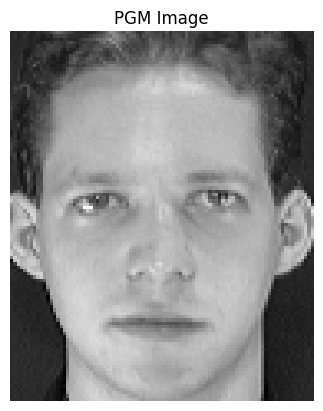

In [ ]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt


img = imageio.imread("s1/1.pgm")
img = img.astype(np.uint8)


plt.imshow(img, cmap='gray')
plt.title("PGM Image")
plt.axis('off')
plt.show()

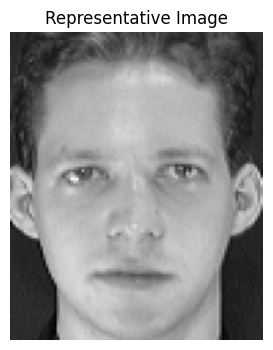

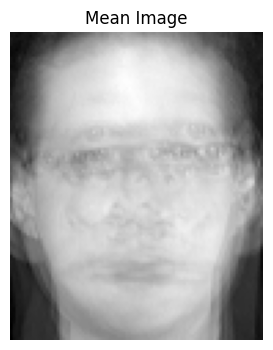

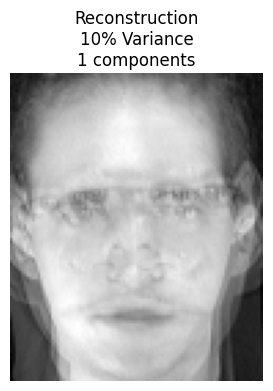

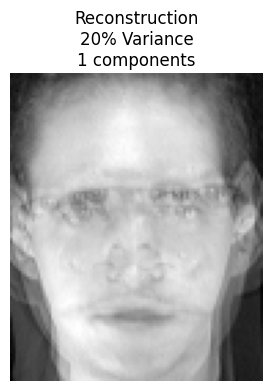

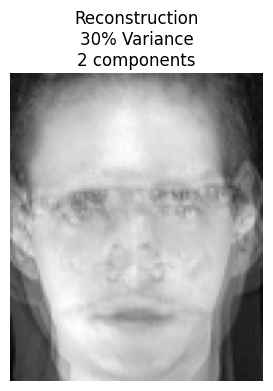

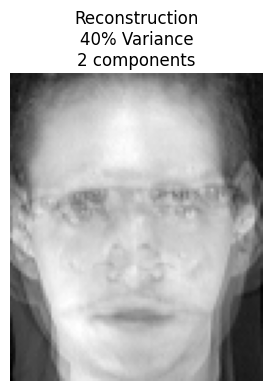

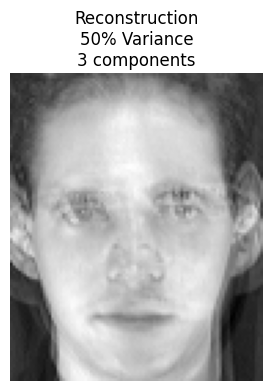

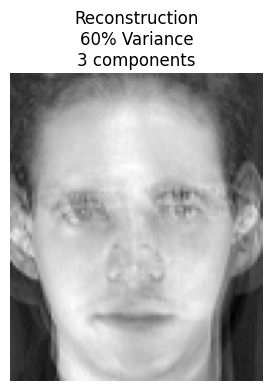

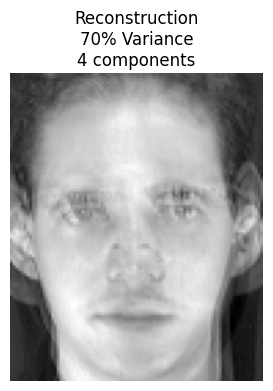

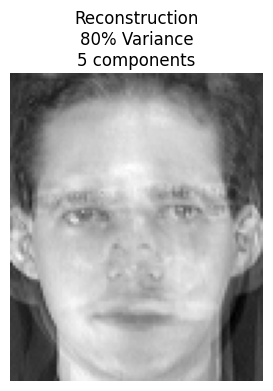

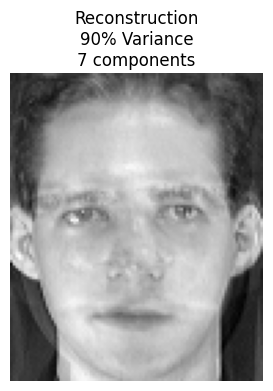

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from sklearn.decomposition import PCA

# --- Step 1: Load .pgm images from a single folder ---
faces = pd.DataFrame()
folder_path = "s1"  # 🔁 Replace with your specific folder

for filename in sorted(os.listdir(folder_path)):
    if filename.lower().endswith(".pgm"):
        path = os.path.join(folder_path, filename)
        try:
            img = imageio.imread(path)
            face = pd.Series(img.flatten(), name=filename)
            faces = pd.concat([faces, face.to_frame().T], ignore_index=True)
        except Exception as e:
            print(f"Error reading {path}: {e}")

# --- Step 2: Set image shape ---
image_shape = (112, 92)  # 🔁 Change this if your images are a different size

# --- Step 3: Show a representative image ---
plt.figure(figsize=(4, 4))
plt.imshow(faces.iloc[0].values.reshape(image_shape), cmap='gray')
plt.title("Representative Image")
plt.axis('off')
plt.show()

# --- Step 4: Show the mean image ---
mean_image = faces.mean(axis=0).values.reshape(image_shape)

plt.figure(figsize=(4, 4))
plt.imshow(mean_image, cmap='gray')
plt.title("Mean Image")
plt.axis('off')
plt.show()

# --- Step 5: Show reconstructed image at each PCA variance level separately ---
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    pca = PCA(n_components=threshold)
    pca.fit(faces)

    transformed = pca.transform(faces)
    reconstructed = pca.inverse_transform(transformed)

    reconstructed_image = reconstructed[0].reshape(image_shape)

    plt.figure(figsize=(4, 4))
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f"Reconstruction\n{int(threshold * 100)}% Variance\n{pca.n_components_} components")
    plt.axis('off')
    plt.show()

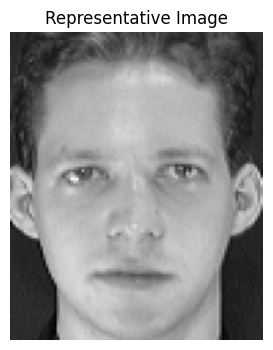

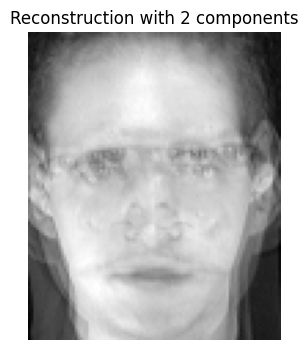

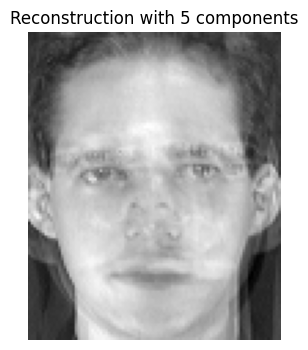

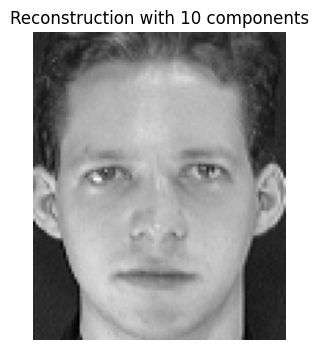

ValueError: n_components=20 must be between 0 and min(n_samples, n_features)=10 with svd_solver='full'

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from sklearn.decomposition import PCA

# --- Step 1: Load .pgm images from one folder ---
faces = pd.DataFrame()
folder_path = "s1"  # 🔁 Replace with your actual folder path

for filename in sorted(os.listdir(folder_path)):
    if filename.lower().endswith(".pgm"):
        path = os.path.join(folder_path, filename)
        try:
            img = imageio.imread(path)
            face = pd.Series(img.flatten(), name=filename)
            faces = pd.concat([faces, face.to_frame().T], ignore_index=True)
        except Exception as e:
            print(f"Error reading {path}: {e}")

# --- Step 2: Set image shape ---
image_shape = (112, 92)  # 🔁 Change if your image has different size

# --- Step 3: Show a representative image ---
plt.figure(figsize=(4, 4))
plt.imshow(faces.iloc[0].values.reshape(image_shape), cmap='gray')
plt.title("Representative Image")
plt.axis('off')
plt.show()

# --- Step 4: Apply PCA for given numbers of components ---
component_list = [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for n_components in component_list:
    pca = PCA(n_components=n_components)
    pca.fit(faces)

    transformed = pca.transform(faces)
    reconstructed = pca.inverse_transform(transformed)

    reconstructed_image = reconstructed[0].reshape(image_shape)

    # --- Step 5: Display each reconstructed image separately ---
    plt.figure(figsize=(4, 4))
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f"Reconstruction with {n_components} components")
    plt.axis('off')
    plt.show()

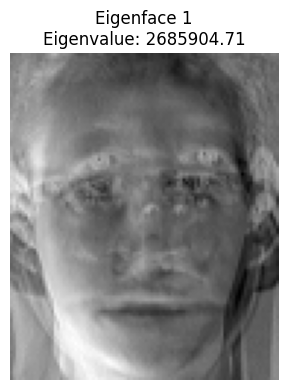

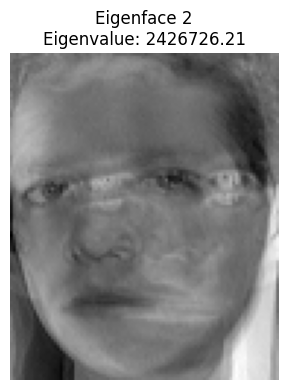

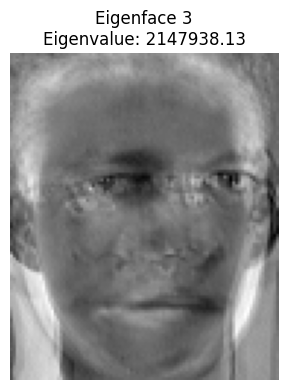

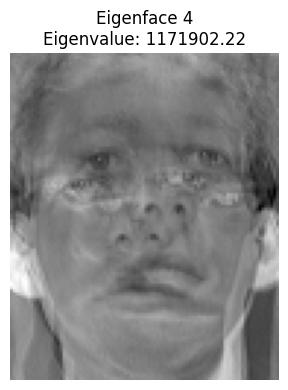

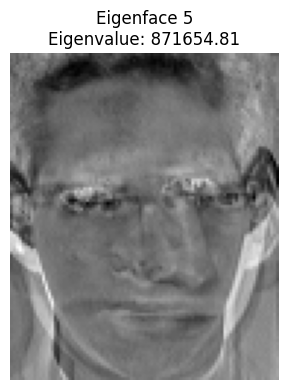

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# --- Step 1: Apply PCA with at least 5 components ---
pca = PCA(n_components=5)
pca.fit(faces)

eigenfaces = pca.components_            # Shape: (5, 10304)
eigenvalues = pca.explained_variance_   # Length: 5
image_shape = (112, 92)                 # 🔁 Replace with your actual image shape

# --- Step 2: Plot each eigenface separately with eigenvalue in the title ---
for i in range(5):
    plt.figure(figsize=(4, 4))
    plt.imshow(eigenfaces[i].reshape(image_shape), cmap='gray')
    plt.title(f"Eigenface {i+1}\nEigenvalue: {eigenvalues[i]:.2f}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
# PANDAS -

In [ ]:
import pandas as pd

# series - One dimensional labeled array

data = pd.Series([10,20,30,40])

print(data)

0    10
1    20
2    30
3    40
dtype: int64


In [ ]:
int(data[2])

30

In [ ]:
# dataframes - 2d data

data = {'name' : ['Rama', 'Sita', 'Raghava'],
        'age' :[23,21,23]

}

print(type(data))

df = pd.DataFrame(data)

print(df)

<class 'dict'>
      name  age
0     Rama   23
1     Sita   21
2  Raghava   23


In [ ]:
print(df['age'][0])

23


In [ ]:
print(df.loc[0]['name'])

Rama


In [ ]:
# generate some dummy data

import numpy as np

data = np.random.rand(10,5)

print(data)



[[0.45278207 0.94808223 0.68061688 0.37701542 0.38339486]
 [0.31524264 0.85007026 0.85241217 0.58440683 0.07301477]
 [0.56327327 0.76831928 0.39506831 0.6609207  0.67263652]
 [0.84825712 0.14978736 0.56143172 0.53583668 0.2456567 ]
 [0.00899238 0.19785128 0.07935941 0.1865274  0.99586301]
 [0.07018889 0.99088165 0.79883569 0.22731855 0.07154369]
 [0.33191393 0.84142996 0.49906416 0.137336   0.41116183]
 [0.29015169 0.53619404 0.82162728 0.67881701 0.92438022]
 [0.79777514 0.05265193 0.82437207 0.80447451 0.04093455]
 [0.82647217 0.2485033  0.16460095 0.3849523  0.85664948]]


In [ ]:
# put this to a csv

df = pd.DataFrame(data)

df.to_csv('data.csv',index=False)


In [ ]:
df1 = pd.read_csv('data.csv')

print(df1)

          0         1         2         3         4
0  0.452782  0.948082  0.680617  0.377015  0.383395
1  0.315243  0.850070  0.852412  0.584407  0.073015
2  0.563273  0.768319  0.395068  0.660921  0.672637
3  0.848257  0.149787  0.561432  0.535837  0.245657
4  0.008992  0.197851  0.079359  0.186527  0.995863
5  0.070189  0.990882  0.798836  0.227319  0.071544
6  0.331914  0.841430  0.499064  0.137336  0.411162
7  0.290152  0.536194  0.821627  0.678817  0.924380
8  0.797775  0.052652  0.824372  0.804475  0.040935
9  0.826472  0.248503  0.164601  0.384952  0.856649


In [ ]:
df.head() # gives the first five entries

0         1         2         3         4
0  0.452782  0.948082  0.680617  0.377015  0.383395
1  0.315243  0.850070  0.852412  0.584407  0.073015
2  0.563273  0.768319  0.395068  0.660921  0.672637
3  0.848257  0.149787  0.561432  0.535837  0.245657
4  0.008992  0.197851  0.079359  0.186527  0.995863

In [ ]:
df.tail(3)

0         1         2         3         4
7  0.290152  0.536194  0.821627  0.678817  0.924380
8  0.797775  0.052652  0.824372  0.804475  0.040935
9  0.826472  0.248503  0.164601  0.384952  0.856649

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10 non-null     float64
 1   1       10 non-null     float64
 2   2       10 non-null     float64
 3   3       10 non-null     float64
 4   4       10 non-null     float64
dtypes: float64(5)
memory usage: 532.0 bytes


In [ ]:
df.describe()

0          1          2          3          4
count  10.000000  10.000000  10.000000  10.000000  10.000000
mean    0.450505   0.558377   0.567739   0.457761   0.467524
std     0.303777   0.364754   0.281486   0.229407   0.370472
min     0.008992   0.052652   0.079359   0.137336   0.040935
25%     0.296424   0.210514   0.421067   0.264743   0.116175
50%     0.392348   0.652257   0.621024   0.460394   0.397278
75%     0.739150   0.847910   0.815929   0.641792   0.810646
max     0.848257   0.990882   0.852412   0.804475   0.995863

In [ ]:
df.shape

(10, 5)

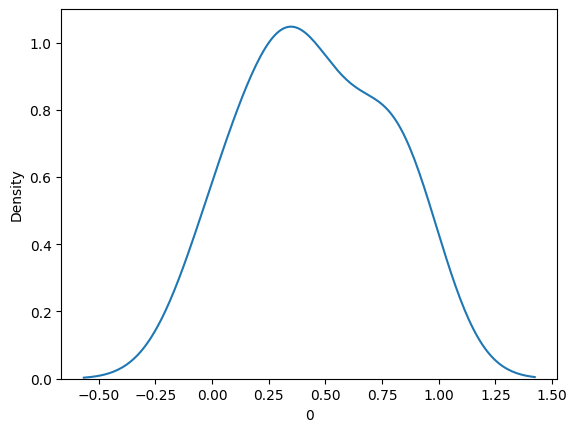

In [ ]:
# KDE plot

import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=df[0])

plt.show()

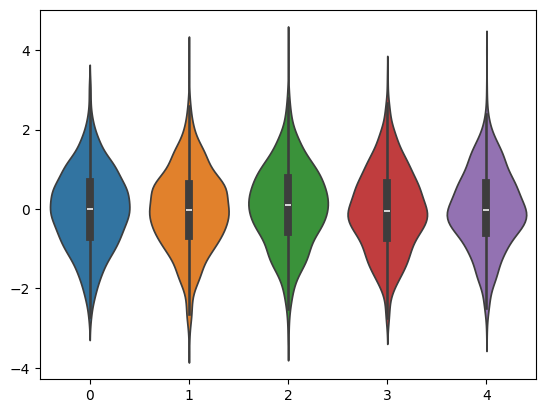

In [ ]:
# violin plot

data = np.random.randn(1000,5)

df = pd.DataFrame(data)

sns.violinplot(data=df)

plt.show()

In [ ]:
corr_matrix = df.corr()

print(corr_matrix)

          0         1         2         3         4
0  1.000000  0.019319 -0.019505  0.046752  0.051896
1  0.019319  1.000000  0.001788 -0.032369  0.047910
2 -0.019505  0.001788  1.000000  0.017687  0.056782
3  0.046752 -0.032369  0.017687  1.000000 -0.020988
4  0.051896  0.047910  0.056782 -0.020988  1.000000


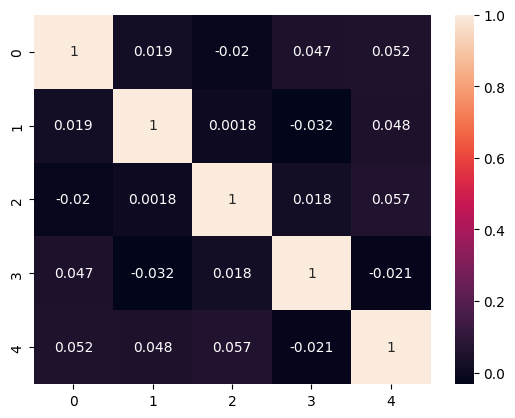

In [ ]:
sns.heatmap(corr_matrix,annot=True)

plt.show()

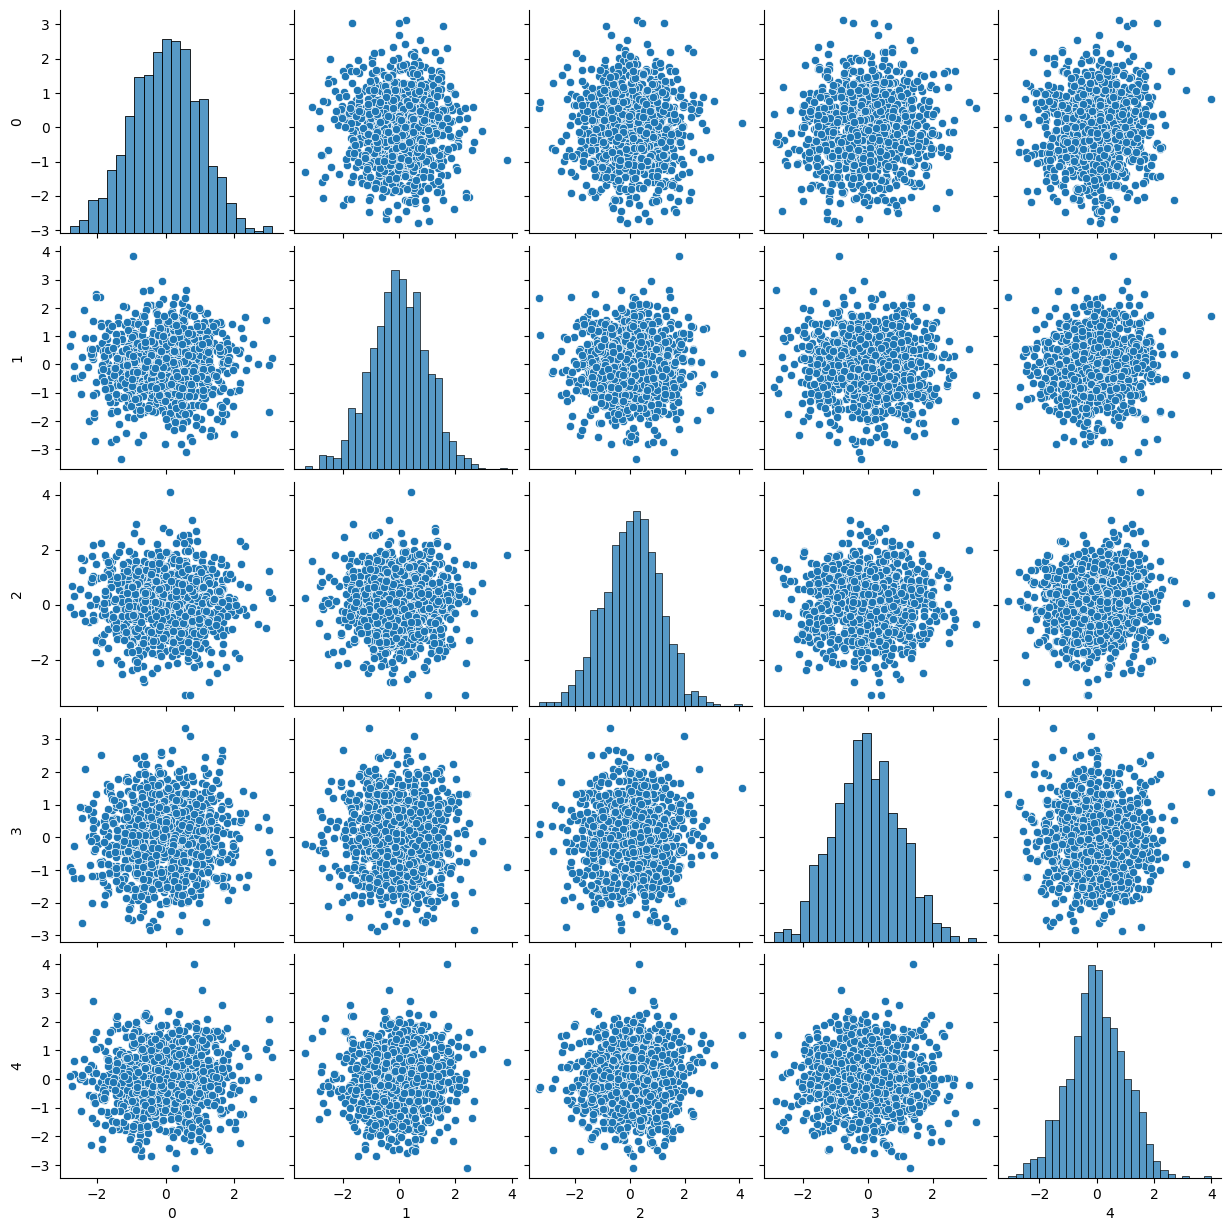

In [ ]:
# pair plot

sns.pairplot(df)

plt.show()

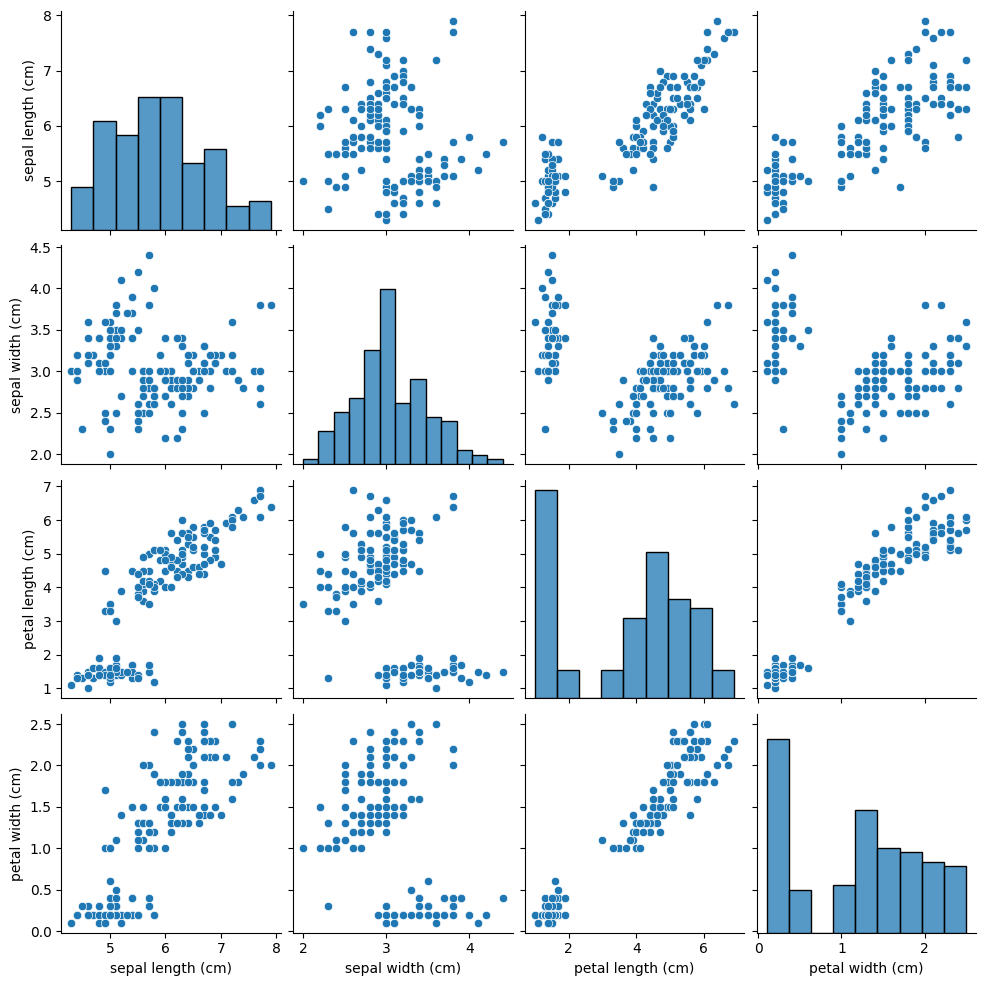

In [ ]:
# plot the pair plot for iris

from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(iris.data,columns=iris.feature_names)

sns.pairplot(df)

plt.show()

In [ ]:
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

In [ ]:
data = np.random.rand(20,5)
df = pd.DataFrame(data)



In [ ]:
df.describe()

0          1          2          3          4
count  20.000000  20.000000  20.000000  20.000000  20.000000
mean    0.572418   0.474186   0.586146   0.609752   0.510167
std     0.341848   0.323021   0.225368   0.293608   0.265338
min     0.005504   0.054104   0.112662   0.082741   0.068805
25%     0.342809   0.240452   0.428841   0.440108   0.331023
50%     0.636645   0.367507   0.622932   0.664318   0.490900
75%     0.845086   0.759978   0.784414   0.830629   0.691684
max     0.998462   0.996484   0.897911   0.962878   0.930133

In [ ]:
df[(df[0] > 0.57) & (df[2] < 0.35) ][[1,3]]

1         3
0   0.951119  0.645133
17  0.376468  0.897232

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(182)
n_samples = 150

data = {
    'Experience' : np.random.normal(loc = 10, scale = 2, size = n_samples),
    'Education' : np.random.randint(1,4,size = n_samples),
    'Salary' : np.random.normal(loc = 30000, scale = 10000, size = n_samples)
}

df = pd.DataFrame(data)


In [ ]:
df.describe()

Experience   Education        Salary
count  150.000000  150.000000    150.000000
mean    10.006949    2.053333  29994.652991
std      2.101250    0.857550  10155.241901
min      4.310899    1.000000   7810.098269
25%      8.654597    1.000000  23210.533112
50%     10.219724    2.000000  29149.360291
75%     11.307106    3.000000  38538.322750
max     14.673975    3.000000  51518.693601

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experience  150 non-null    float64
 1   Education   150 non-null    int64  
 2   Salary      150 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.6 KB


In [ ]:
for col in df.columns:
  df.loc[df.sample(frac=0.2).index,col] = np.nan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experience  98 non-null     float64
 1   Education   94 non-null     float64
 2   Salary      95 non-null     float64
dtypes: float64(3)
memory usage: 3.6 KB


In [ ]:
df.describe()

Experience  Education        Salary
count   98.000000  94.000000     95.000000
mean    10.094550   2.000000  30487.793747
std      2.024132   0.829561  10205.726098
min      4.614202   1.000000   8831.597239
25%      8.756935   1.000000  24145.093038
50%     10.368643   2.000000  29322.340751
75%     11.335725   3.000000  39267.137661
max     14.447461   3.000000  51518.693601

In [ ]:
df['Education'].fillna(df['Education'].mode()[0])
df['Experience'].fillna(df['Experience'].mean())
df['Salary'].fillna(df['Salary'].median())

0      24677.488583
1      27848.380691
2      41892.600485
3      26555.751072
4      20972.225683
           ...     
145    29295.315088
146    29322.340751
147    29322.340751
148    13056.342809
149    35350.358332
Name: Salary, Length: 150, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experience  150 non-null    float64
 1   Education   150 non-null    float64
 2   Salary      150 non-null    float64
dtypes: float64(3)
memory usage: 3.6 KB


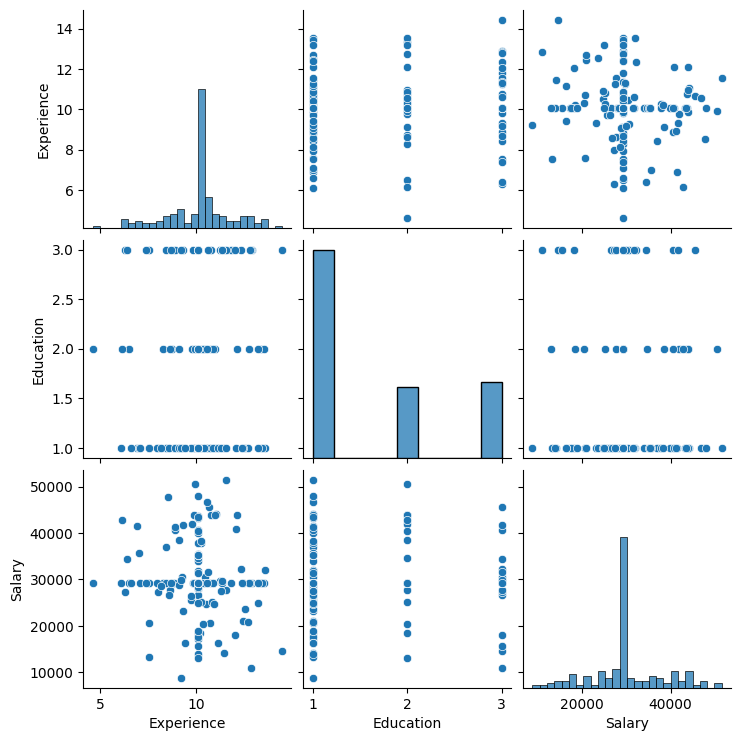

In [ ]:
sns.pairplot(df)

plt.show()

In [ ]:
X = df.drop('Salary',axis=1)
y = df['Salary']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [ ]:
# train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_pred)

print(mse)

49557846.14563413


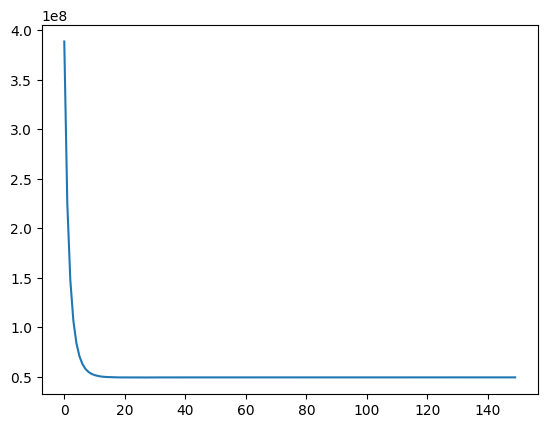

In [ ]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(loss = 'squared_error' , learning_rate= 'invscaling', eta0 = 0.01, max_iter=1)

max_epochs = 150
loss = []

for epoch in range(max_epochs):
  model.partial_fit(X_train,y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test,y_pred)
  loss.append(mse)

plt.plot(loss)
plt.show()

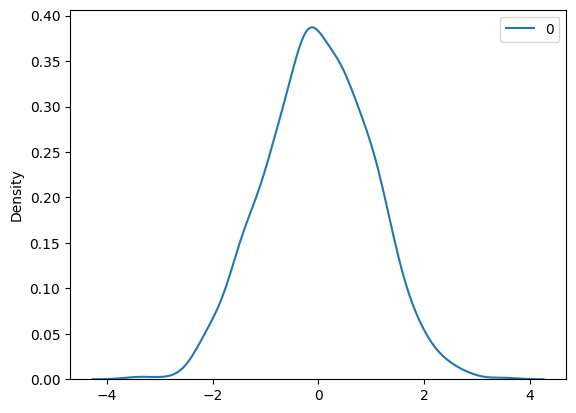

In [ ]:


X = np.random.normal(loc = 15, scale = 3,size = 1000).reshape(-1,1)

X_scaled = scaler.fit_transform(X)

sns.kdeplot(X_scaled)

plt.show()



In [ ]:
# MLp

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 202kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.74MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 15.8MB/s]


In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 5
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


In [ ]:
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.int).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")


Epoch 1
-------------------------------
loss: 0.811480  [   64/60000]
loss: 0.883197  [ 6464/60000]
loss: 0.645474  [12864/60000]
loss: 0.835207  [19264/60000]
loss: 0.739656  [25664/60000]
loss: 0.735263  [32064/60000]
loss: 0.836465  [38464/60000]
loss: 0.789856  [44864/60000]
loss: 0.808154  [51264/60000]
loss: 0.771222  [57664/60000]
Test Error: 
 Accuracy: 71.4%, Avg loss: 0.767267 

Epoch 2
-------------------------------
loss: 0.774382  [   64/60000]
loss: 0.853252  [ 6464/60000]
loss: 0.613550  [12864/60000]
loss: 0.810622  [19264/60000]
loss: 0.719294  [25664/60000]
loss: 0.709110  [32064/60000]
loss: 0.812035  [38464/60000]
loss: 0.773061  [44864/60000]
loss: 0.785972  [51264/60000]
loss: 0.750706  [57664/60000]
Test Error: 
 Accuracy: 72.7%, Avg loss: 0.745288 

Epoch 3
-------------------------------
loss: 0.742088  [   64/60000]
loss: 0.826526  [ 6464/60000]
loss: 0.586623  [12864/60000]
loss: 0.790076  [19264/60000]
loss: 0.701893  [25664/60000]
loss: 0.687861  [32064/600

In [ ]:
# save your model
torch.save(model, 'model.pth')

In [ ]:
model = torch.load('model.pth', weights_only=False)


Training without normalization...

Training with normalization...


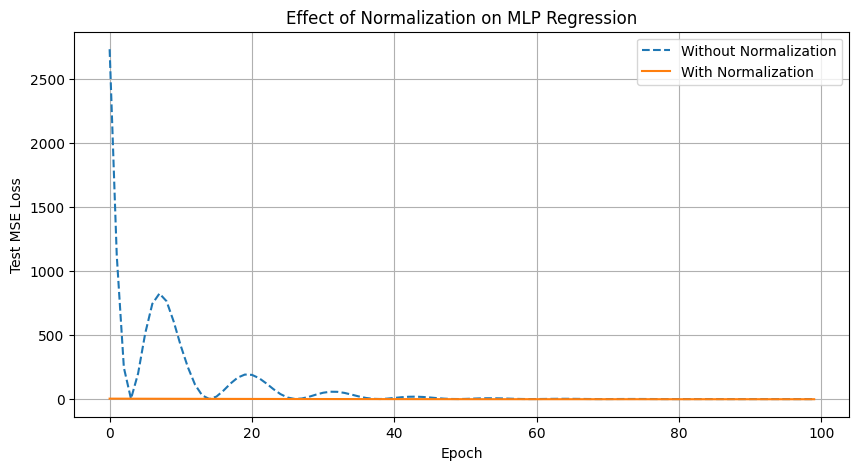

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Set random seed
torch.manual_seed(42)

# 1. Load California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# To tensor
def to_tensor(X, y):
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).view(-1, 1)

X_train_tensor, y_train_tensor = to_tensor(X_train, y_train)
X_test_tensor, y_test_tensor = to_tensor(X_test, y_test)

# 3. Define MLP model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)

# 4. Train function
def train_model(model, X_train, y_train, X_test, y_test, lr=0.001, epochs=100):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            test_pred = model(X_test)
            test_loss = criterion(test_pred, y_test)

        train_losses.append(loss.item())
        test_losses.append(test_loss.item())

    return train_losses, test_losses, model

# 5. Without Normalization
print("\nTraining without normalization...")
model_no_norm = MLP(input_dim=X.shape[1])
losses_no_norm, test_losses_no_norm, _ = train_model(model_no_norm, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)

# 6. With Normalization
print("\nTraining with normalization...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_tensor, y_train_tensor = to_tensor(X_train_scaled, y_train)
X_test_scaled_tensor, y_test_tensor = to_tensor(X_test_scaled, y_test)

model_norm = MLP(input_dim=X.shape[1])
losses_norm, test_losses_norm, _ = train_model(model_norm, X_train_scaled_tensor, y_train_tensor, X_test_scaled_tensor, y_test_tensor)

# 7. Plotting
plt.figure(figsize=(10, 5))
plt.plot(test_losses_no_norm, label="Without Normalization", linestyle='--')
plt.plot(test_losses_norm, label="With Normalization", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Test MSE Loss")
plt.title("Effect of Normalization on MLP Regression")
plt.legend()
plt.grid(True)
plt.show()


100%|██████████| 170M/170M [00:02<00:00, 76.1MB/s]



Training without Batch Normalization...
Epoch [1/10], Train Acc: 0.4160, Test Acc: 0.5190
Epoch [2/10], Train Acc: 0.5687, Test Acc: 0.6074
Epoch [3/10], Train Acc: 0.6404, Test Acc: 0.6674
Epoch [4/10], Train Acc: 0.6871, Test Acc: 0.6855
Epoch [5/10], Train Acc: 0.7211, Test Acc: 0.7030
Epoch [6/10], Train Acc: 0.7530, Test Acc: 0.7101
Epoch [7/10], Train Acc: 0.7781, Test Acc: 0.7365
Epoch [8/10], Train Acc: 0.8022, Test Acc: 0.7399
Epoch [9/10], Train Acc: 0.8241, Test Acc: 0.7518
Epoch [10/10], Train Acc: 0.8450, Test Acc: 0.7385

Training with Batch Normalization...
Epoch [1/10], Train Acc: 0.5577, Test Acc: 0.5950
Epoch [2/10], Train Acc: 0.6997, Test Acc: 0.6408
Epoch [3/10], Train Acc: 0.7539, Test Acc: 0.7201
Epoch [4/10], Train Acc: 0.7853, Test Acc: 0.7314
Epoch [5/10], Train Acc: 0.8146, Test Acc: 0.7569
Epoch [6/10], Train Acc: 0.8392, Test Acc: 0.7378
Epoch [7/10], Train Acc: 0.8593, Test Acc: 0.7378
Epoch [8/10], Train Acc: 0.8800, Test Acc: 0.7228
Epoch [9/10], Train 

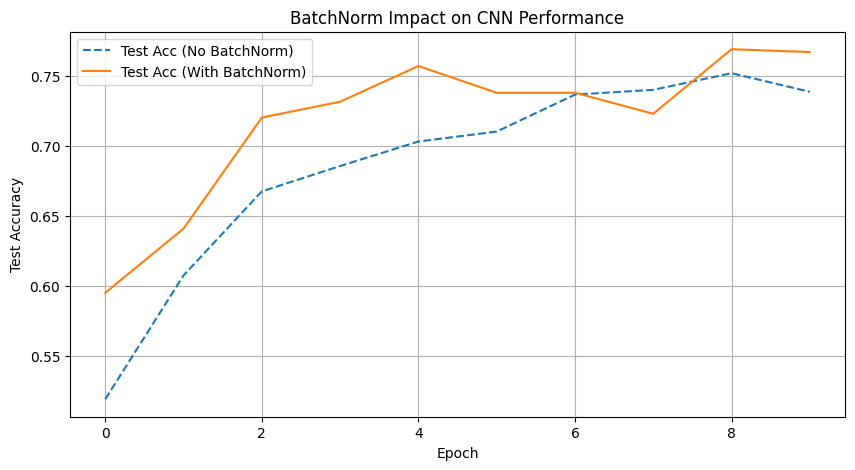

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Set seed for reproducibility
torch.manual_seed(42)

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 1. Load CIFAR-10 with basic normalization
transform = transforms.Compose([
    transforms.ToTensor()
])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False)

# 2. CNN with optional BatchNorm
class SimpleCNN(nn.Module):
    def __init__(self, use_bn=False):
        super(SimpleCNN, self).__init__()
        self.use_bn = use_bn
        def conv_block(in_channels, out_channels):
            layers = [nn.Conv2d(in_channels, out_channels, 3, padding=1)]
            if use_bn:
                layers.append(nn.BatchNorm2d(out_channels))
            layers.append(nn.ReLU())
            layers.append(nn.MaxPool2d(2))
            return nn.Sequential(*layers)

        self.net = nn.Sequential(
            conv_block(3, 32),
            conv_block(32, 64),
            conv_block(64, 128),
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        return self.net(x)

# 3. Training function
def train_model(model, train_loader, test_loader, epochs=10):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_acc_list = []
    test_acc_list = []

    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_acc = correct / total
        train_acc_list.append(train_acc)

        # Evaluation
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        test_acc = correct / total
        test_acc_list.append(test_acc)

        print(f"Epoch [{epoch+1}/{epochs}], Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

    return train_acc_list, test_acc_list

# 4. Train without BatchNorm
print("\nTraining without Batch Normalization...")
model_no_bn = SimpleCNN(use_bn=False)
train_acc_no_bn, test_acc_no_bn = train_model(model_no_bn, train_loader, test_loader, epochs=10)

# 5. Train with BatchNorm
print("\nTraining with Batch Normalization...")
model_with_bn = SimpleCNN(use_bn=True)
train_acc_bn, test_acc_bn = train_model(model_with_bn, train_loader, test_loader, epochs=10)

# 6. Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(test_acc_no_bn, label='Test Acc (No BatchNorm)', linestyle='--')
plt.plot(test_acc_bn, label='Test Acc (With BatchNorm)', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.title("BatchNorm Impact on CNN Performance")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# VGG-19

import torch.nn as nn

class VGG19(nn.Module):
    def __init__(self, num_classes=1000):
        super(VGG19, self).__init__()
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 4
            nn.Conv2d(256, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 5
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096), nn.ReLU(inplace=True), nn.Dropout(),
            nn.Linear(4096, 4096), nn.ReLU(inplace=True), nn.Dropout(),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.classifier(x)
        return x

In [ ]:
import torch.nn as nn

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.residual = nn.Sequential(
            nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(planes),
            nn.ReLU(inplace=True),
            nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(planes)
        )

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion * planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * planes)
            )

    def forward(self, x):
        return nn.ReLU(inplace=True)(self.residual(x) + self.shortcut(x))

class ResNet18(nn.Module):
    def __init__(self, num_classes=1000):
        super(ResNet18, self).__init__()
        self.in_planes = 64
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )

        self.layer1 = self._make_layer(BasicBlock, 64, 2, stride=1)
        self.layer2 = self._make_layer(BasicBlock, 128, 2, stride=2)
        self.layer3 = self._make_layer(BasicBlock, 256, 2, stride=2)
        self.layer4 = self._make_layer(BasicBlock, 512, 2, stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * BasicBlock.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for s in strides:
            layers.append(block(self.in_planes, planes, s))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

In [ ]:
import torch
import torchvision.models as models

# Load a pretrained ResNet-18
model = models.resnet18(pretrained=True)  # For torchvision < 0.13
# For torchvision >= 0.13, use:
# model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

# Set model to evaluation mode
model.eval()

In [ ]:
import torch.nn as nn

num_classes = 10
model.fc = nn.Linear(model.fc.in_features, num_classes)

In [ ]:
#VGG-19 - models.vgg19(pretrained=True)
#ResNet-50 - models.resnet50(pretrained=True)
#MobileNetV2 - models.mobilenet_v2(pretrained=True)
#EfficientNet-B0 - models.efficientnet_b0(pretrained=True)
#ViT (if supported) - models.vit_b_16(weights='IMAGENET1K_V1')


In [ ]:
# fine tuning

# base model : ResNet-18 , 1K
# Dataset : CIFAR-100
# Perform the finetuning

In [ ]:
# load the CIFAR 100 data

In [ ]:
# load the ResNet-18 Model

In [ ]:
# Training (Fine Tuning loop)